# Mount drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/trabajo-final-check-worthiness/check-worthiness-project
%ls

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1S2YTpyjEJLco8XPXsyW3F4GAELxQkz49/trabajo-final-check-worthiness/check-worthiness-project
beto/              embeddings-new_large-general_3B_fasttext.vec  git_commands.ipynb  __pycache__/
beto-fine-tuning/  encoder/                                      InferSent/
data/              fasttext/                                     main.ipynb


# Dataset loading
`Using datasets in spanish language only`

>### clef2021-checkthat
>[dev & train](https://github.com/Newtral-Tech/clef2021-checkthat/tree/main)
>[testing](https://gitlab.com/checkthat_lab/clef2021-checkthat-lab/-/blob/master/task1/test-gold/subtask-1a--spanish.zip)  
>`topic_id | tweet_id | tweet_url | tweet_text | claim | check-worthiness`
>- data/clef2021-checkthat/dataset_train.csv.zip
>- data/clef2021-checkthat/dataset_dev.csv.zip
>- data/clef2021-checkthat/dataset_test_goldstandard.csv.zip



>### clef2022-checkthat-lab
>[dev dev_test train](https://gitlab.com/checkthat_lab/clef2022-checkthat-lab/clef2022-checkthat-lab/-/tree/main/task1/data/subtasks-spanish)  
>`topic | tweet_id | tweet_url | tweet_text | class_label`
>- data/clef2022-checkthat-lab/CT22_spanish_1A_checkworthy_train.csv.zip
>- data/clef2022-checkthat-lab/CT22_spanish_1A_checkworthy_dev.csv.zip
>- data/clef2022-checkthat-lab/CT22_spanish_1A_checkworthy_dev_test.csv.zip

>### clef2023-checkthat-lab
>[dev dev_test train](https://gitlab.com/checkthat_lab/clef2023-checkthat-lab/-/tree/main/task1/data)  
>`tweet_id | tweet_url | tweet_text | class_label`
>- data/clef2023-checkthat-lab/CT23_1B_checkworthy_spanish_train.csv.zip
>- data/clef2023-checkthat-lab/CT23_1B_checkworthy_spanish_dev.csv.zip
>- data/clef2023-checkthat-lab/CT23_1B_checkworthy_spanish_dev_test.csv.zip

In [3]:
import pandas as pd
import numpy as np

In [ ]:
# Training dataset

train_df = pd.read_csv('data/clef2021-checkthat/dataset_train.csv.zip')
train_df = train_df.drop('topic_id', axis=1)
train_df = train_df[train_df['claim'] == 1].drop('claim', axis=1) # 2495 a 952
train_df = train_df.rename(columns={'check-worthiness': 'class_label'})

aux_df = pd.read_csv('data/clef2022-checkthat-lab/CT22_spanish_1A_checkworthy_train.csv.zip')
aux_df = aux_df.drop('topic', axis=1)
train_df = pd.concat([train_df, aux_df])

aux_df = pd.read_csv('data/clef2023-checkthat-lab/CT23_1B_checkworthy_spanish_train.csv.zip')
aux_df['class_label'] = aux_df['class_label'].replace('No', 0).replace('Yes', 1)
train_df = pd.concat([train_df, aux_df], ignore_index=True)  # every dataframe concatenated

train_df = train_df.set_index('tweet_id')
train_df.index = train_df.index.astype(str)
train_df

,tweet_url,tweet_text,class_label
tweet_id,,,
1217566329823252481,https://twitter.com/user/status/12175663298232...,@tve_tve vuelve a quedar en evidencia. Desplaz...,0
1172059020095610881,https://twitter.com/user/status/11720590200956...,El nuevo curso escolar en #Andalucía comienza ...,0
1226480356955693056,https://twitter.com/user/status/12264803569556...,El PP se equivoca total y completamente excluy...,0
1259920819834191872,https://twitter.com/user/status/12599208198341...,Si algo define a @CruzRojaEsp es que siempre e...,0
1226086367710580737,https://twitter.com/user/status/12260863677105...,"Hoy @populares se ha unido a PSOE, PODEMOS y ...",0
...,...,...,...
1447650732581310470,https://twitter.com/user/status/14476507325813...,"Las organizaciones médicas alertan de una ""inm...",0
1456501355833696256,https://twitter.com/user/status/14565013558336...,82 días desde que empezó el #IFNavalacruz en #...,0
1440963865848819714,https://twitter.com/user/status/14409638658488...,🌍 Valiente y coherente‼️ El presidente Pedro S...,0


In [ ]:
# Dev dataset

dev_df = pd.read_csv('data/clef2021-checkthat/dataset_dev.csv.zip')
dev_df = dev_df.drop('topic_id', axis=1)
dev_df = dev_df[dev_df['claim'] == 1].drop('claim', axis=1)
dev_df = dev_df.rename(columns={'check-worthiness': 'class_label'})

aux_df = pd.read_csv('data/clef2022-checkthat-lab/CT22_spanish_1A_checkworthy_dev.csv.zip')
aux_df = aux_df.drop('topic', axis=1)
dev_df = pd.concat([dev_df, aux_df])

aux_df = pd.read_csv('data/clef2023-checkthat-lab/CT23_1B_checkworthy_spanish_dev.csv.zip')
aux_df['class_label'] = aux_df['class_label'].replace('No', 0).replace('Yes', 1)
dev_df = pd.concat([dev_df, aux_df], ignore_index=True)  # every dataframe concatenated

dev_df = dev_df.set_index('tweet_id')
dev_df.index = dev_df.index.astype(str)
dev_df

,tweet_url,tweet_text,class_label
tweet_id,,,
1227543257690918913,https://twitter.com/user/status/12275432576909...,4. La conclusión para no iniciados es clara: l...,1
1222917768774856707,https://twitter.com/user/status/12229177687748...,SUMA Y SIGUE\n\nTambién se ha detectado que Co...,1
1176096346379575296,https://twitter.com/user/status/11760963463795...,@CiudadanosCs #ThomasCook tiene en #España cer...,0
1224776781753978882,https://twitter.com/user/status/12247767817539...,"📢 Es insuficiente la subida del 0,9% de pensio...",0
1220305130324742145,https://twitter.com/user/status/12203051303247...,Que Sánchez DEPENDE del independentismo no es ...,0
...,...,...,...
1456998178008481800,https://twitter.com/user/status/14569981780084...,Los 10 mejores cantantes de la historia del ro...,0
1444601817590124544,https://twitter.com/user/status/14446018175901...,La izquierda y la 'pobreza energética' . http...,0
1449465039027687427,https://twitter.com/user/status/14494650390276...,Un orgullo formar parte de la mesa del 40 cong...,0


In [ ]:
# Test dataset

test_df = pd.read_csv('data/clef2021-checkthat/dataset_test_goldstandard.csv.zip')
test_df = test_df.drop('topic_id', axis=1)
test_df = test_df[test_df['claim'] == 1].drop('claim', axis=1)
test_df = test_df.rename(columns={'check-worthiness': 'class_label'})

aux_df = pd.read_csv('data/clef2022-checkthat-lab/CT22_spanish_1A_checkworthy_dev_test.csv.zip')
aux_df = aux_df.drop('topic', axis=1)
test_df = pd.concat([test_df, aux_df])

aux_df = pd.read_csv('data/clef2023-checkthat-lab/CT23_1B_checkworthy_spanish_dev_test.csv.zip')
aux_df['class_label'] = aux_df['class_label'].replace('No', 0).replace('Yes', 1)
test_df = pd.concat([test_df, aux_df], ignore_index=True)  # every dataframe concatenated

test_df = test_df.set_index('tweet_id')
test_df.index = test_df.index.astype(str)
test_df

,tweet_url,tweet_text,class_label
tweet_id,,,
1296128564090351616,https://twitter.com/user/status/12961285640903...,"Qué tal si ponemos el foco aquí? ¿""Por no ser ...",1
1260816850658775042,https://twitter.com/user/status/12608168506587...,El 75% de los créditos ICO para pymes y autóno...,1
1268857203366256641,https://twitter.com/user/status/12688572033662...,"Visito Torrejón de Ardoz con su alcalde, donde...",1
1188175222026973184,https://twitter.com/user/status/11881752220269...,"Aquí tienen a TV3, una tv que pagamos todos, c...",0
1219242938389102592,https://twitter.com/user/status/12192429383891...,La tragedia vuelve a sacudirnos con un crimen ...,0
...,...,...,...
1454818788126380037,https://twitter.com/user/status/14548187881263...,"Para ser grande, se entero: nada tuyo exageres...",0
1464547666487132170,https://twitter.com/user/status/14645476664871...,Las políticas de @PSOE son las de la mayoría s...,0
1458749622592155648,https://twitter.com/user/status/14587496225921...,Un gobierno incompetente y que engaña a los es...,1


# Preprocessing
```
******************** hidden ********************
```

In [ ]:
import re
import spacy
!python -m spacy download es_core_news_lg

In [ ]:
nlp = spacy.load("es_core_news_lg")

In [ ]:
def preprocess_tweet(tweet: str) -> str:
        """Function that cleans the input text by going to:
        - remove links
        - remove usernames
        - remove special characters
        - remove numbers
        - remove stopwords
        - convert to lowercase
        - remove excessive white spaces
        Arguments:
            text (str): text to clean
            remove_stopwords (bool): whether to remove stopwords
        Returns:
            str: cleaned text
        """
        # tokenization
        doc = nlp(tweet)

        tokens = []
        for token in doc:
            if token.text.startswith("@"):  # replace all user mentions with the special token "user"
                tokens.append("USER")
            elif is_url(token.text):
                tokens.append('URL')
            elif doc[token.i - 1].text == "#":
                if is_hashtag_upper_camel_case(token.text):
                    tokens.extend(chunk.lower() for chunk in re.findall(r'[A-Z][a-z\d]+', token.text))
                else:  # not UpperCamelCase
                    tokens.append("HASHTAG")
            #    print('hashtag', token.text)
            #    if is_hashtag_upper_camel_case(token.text):
            #        tokens.append(re.findall(r'[A-Z][a-z\d]+', token.text[1:]))
            #    else:  # not UpperCamelCase
            #        tokens.append("HASHTAG")
            elif token.is_stop or not token.is_alpha:  # eliminación de stopwords y caracteres no alfabéticos
                continue
            else:
                tokens.append(token.lemma_.lower())

        # replace all user mentions with the special token "user"
        #tokens = [re.sub(r'@\w+', 'user', token.text) for token in doc]

        # splitting hashtags into separate words based on UpperCamelCase
        #tokens = [re.sub(r'#[A-Z][a-z\d]+', lambda hashtag: ' '.join(re.findall('[A-Z][a-z\d]*', hashtag.group())), tweet) for token in tokens]

        # lemmatization, case conversion, eliminación de stopwords y caracteres no alfabéticos
        #tokens = [token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha]

        return tokens

In [ ]:
train_df.head()

In [ ]:
train_df["cleaned"] = train_df['tweet_text'].apply(
    lambda x: preprocess_tweet(x)
)

In [ ]:
test_df["cleaned"] = test_df['tweet_text'].apply(
    lambda x: preprocess_tweet(x)
)

In [ ]:
print(train_df.iloc[3].tweet_text, '\n')
train_df.iloc[3].cleaned

In [ ]:
print(train_df.iloc[1].tweet_text, '\n')
train_df.iloc[1].cleaned

In [ ]:
print(train_df.iloc[6].tweet_text, '\n')
train_df.iloc[6].cleaned

In [ ]:
print(test_df.iloc[10].tweet_text, '\n')
test_df.iloc[10].cleaned

In [ ]:
train_df.head()

In [ ]:
test_df.head()

# Embeddings pruebas
```
******************** hidden ********************
```

## Word2vec

In [ ]:
from gensim.models import Word2Vec

### Training

In [ ]:
texts = train_df['cleaned'].tolist() + test_df['cleaned'].tolist()

*   vectors_size : defines the dimensions of our vector space.
*   min_count: Words below the min_count frequency are removed from the vocabulary before training.
*   window: maximum distance between the current and the expected word within a sentence.
*   sg: defines the training algorithm. 0 = CBOW (continuous bag of words), 1 = Skip-Gram.

In [ ]:
feature_size = 10  # Word vector dimensionality. El original es 100, acá lo achicamos.
min_word_count = 1  # Minimum word count
window_context = 30  # Context window size
sample = 1e-3 # Downsample setting for frequent words
sg = 1  # Training algorithm: 1 for skip-gram; otherwise CBOW.

# w2v_model = Word2Vec(
#     sentences=texts,
#     vector_size=feature_size,
#     min_count=min_word_count,
#     window=window_context,
#     sample=sample,
#     sg=sg,
#     epochs=50  # iterations
# )

In [ ]:
w2v_model.wv['eliminar']

In [ ]:
w2v_model.wv.most_similar(positive=['funcionario'], topn=3)

In [ ]:
from pprint import pprint
# view similar words based on gensim's model
similar_words = {
    search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
    for search_term in ['enfermedad', 'pandemia', 'funcionario', 'política', 'economía']
}
pprint(similar_words)

In [ ]:
print(type(w2v_model.wv[train_df['cleaned'].iloc[3][0]]))
print(w2v_model.wv[train_df['cleaned'].iloc[3][0]])
pd.DataFrame([w2v_model.wv[word] for word in train_df['cleaned'].iloc[3]])

### Visualization

In [ ]:
from sklearn.manifold import TSNE
def reduce_dimensions(model):
    num_components = 2  # number of dimensions to keep after compression

    # extract vocabulary from model and vectors in order to associate them in the graph
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)

    # apply TSNE
    tsne = TSNE(n_components=num_components, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


def plot_embeddings(x_vals, y_vals, labels):
    import plotly.graph_objs as go
    fig = go.Figure()
    trace = go.Scatter(x=x_vals, y=y_vals, mode='markers', text=labels)
    fig.add_trace(trace)
    fig.update_layout(title="Word2Vec - Visualizzazione embedding con TSNE")
    fig.show()
    return fig


#x_vals, y_vals, labels = reduce_dimensions(w2v_model)

#plot = plot_embeddings(x_vals, y_vals, labels)

## Beto (Bert for spanish)

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.6 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer, BertModel
import torch
tokenizer = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")
model = BertModel.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")

Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Ejemplo de texto de entrada
text = "¡Hola! Esto es un ejemplo de texto en español."

# Tokenizar el texto de entrada
tokens = tokenizer.tokenize(text)

# Convertir los tokens en IDs de entrada para el modelo
input_ids = tokenizer.convert_tokens_to_ids(tokens)

# Pasar los IDs de entrada al modelo para obtener la representación
outputs = model(torch.tensor([input_ids]))

# Obtener la representación codificada por BERT
encoded_representation = outputs

In [ ]:
encoded_representation

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.0975,  0.0328,  0.0043,  ..., -0.6935,  0.6566,  0.1801],
         [ 0.4714,  0.3867, -0.6651,  ...,  0.0906, -0.0107, -0.9708],
         [-0.0827,  0.6042,  0.1536,  ..., -0.5443, -0.4434, -0.5016],
         ...,
         [ 0.0023,  0.3124,  0.1166,  ..., -0.9059,  0.3952,  0.3471],
         [ 0.3725,  0.7044,  0.2323,  ..., -0.8896,  0.5634, -0.0404],
         [ 0.6092,  0.7224, -0.0862,  ..., -0.8786,  0.0171,  0.0282]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[ 0.1081,  0.5474,  0.6223, -0.2034,  0.4861, -0.2344, -0.6504,  0.1672,
         -0.3687, -0.8555, -0.2620,  0.2067, -0.4149, -0.3755, -0.2553, -0.6993,
          0.2366,  0.3558, -0.1686, -0.2782,  0.4591,  0.0959,  0.6203,  0.0770,
          0.3322, -0.3514,  0.1416, -0.6509,  0.0504, -0.4374,  0.0511,  0.0678,
         -0.3815,  0.4206,  0.5388, -0.8616, -0.6557, -0.8514,  0.1535, -0.1754,
         -0.3071, -0.2578, -0.05

## Bert fine-tuning


Google Colab offers free GPUs and TPUs! Since we'll be training a large neural network it's best to take advantage of this (in this case we'll attach a GPU), otherwise training will take a very long time.

A GPU can be added by going to the menu and selecting:

`Edit 🡒 Notebook Settings 🡒 Hardware accelerator 🡒 (GPU)`

Then run the following cell to confirm that the GPU is detected.

In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In order for torch to use the GPU, we need to identify and specify the GPU as the device. Later, in our training loop, we will load data onto the device.

In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


### BetoFineTuningTransformer

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 104.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.4 MB/s eta 0:00:00


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.utils import pad_sequences
from transformers import BertTokenizer

In [ ]:
class BetoFineTuningTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, model_path):
        self.tokenizer = BertTokenizer.from_pretrained(model_path)

    def fit(self, X, y=None):
        # BERT no requiere fit
        return self

    def transform(self, X, y=None):
        '''
        '''
        # Set the maximum sequence length.
        # I've chosen 350 somewhat arbitrarily. It's slightly larger than the
        # maximum training sentence length of 328...
        MAX_LEN = 350

        # Tokenize all of the sentences and map the tokens to thier word IDs.
        input_ids = []

        # For every sentence...
        for index, tweet in X.items():
            # `encode` will:
            #   (1) Tokenize the sentence.
            #   (2) Prepend the `[CLS]` token to the start.
            #   (3) Append the `[SEP]` token to the end.
            #   (4) Map tokens to their IDs.
            encoded = self.tokenizer.encode(
                                tweet,                      # Sentence to encode.
                                add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                )
            input_ids.append(encoded)

        # Pad our input tokens
        input_ids = pad_sequences(input_ids, maxlen=MAX_LEN,
                                dtype="long", truncating="post", padding="post")

        # Create attention masks
        attention_masks = []

        # Create a mask of 1s for each token followed by 0s for padding
        for seq in input_ids:
            seq_mask = [float(i>0) for i in seq]
            attention_masks.append(seq_mask)

        # Convert to tensors.
        prediction_inputs = torch.tensor(input_ids)
        prediction_masks = torch.tensor(attention_masks)

        # Set the batch size.
        batch_size = 32

        # Create the DataLoader.
        prediction_data = TensorDataset(prediction_inputs, prediction_masks)
        prediction_sampler = SequentialSampler(prediction_data)
        prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

        return (prediction_data, prediction_sampler, prediction_dataloader)

In [ ]:
betofinetuningtransformer = BetoFineTuningTransformer('./beto-fine-tuning/').fit_transform(test_df['tweet_text'])

In [ ]:
betofinetuningtransformer

(<torch.utils.data.dataset.TensorDataset at 0x78de4a346da0>,
 <torch.utils.data.dataloader.DataLoader at 0x78df452da080>)

### BetoFineTuningClassifier

In [ ]:
from transformers import BertForSequenceClassification
import tensorflow as tf
import torch

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

In [ ]:
class BetoFineTuningClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model_path):
        # Load a trained model and vocabulary that you have fine-tuned
        self.model = BertForSequenceClassification.from_pretrained(model_path)
        # Tell pytorch to run this model on the GPU.
        self.model.cuda()
        # Put model in evaluation mode
        self.model.eval()
        self.device = self.init_device()

    def init_device(self):
        # If there's a GPU available...
        if torch.cuda.is_available():

            # Tell PyTorch to use the GPU.
            device = torch.device("cuda")

            print('There are %d GPU(s) available.' % torch.cuda.device_count())

            print('We will use the GPU:', torch.cuda.get_device_name(0))

        # If not...
        else:
            print('No GPU available, using the CPU instead.')
            device = torch.device("cpu")

        return device

    def fit(self, X, y=None):
        # BERT no requiere fit
        self.classes_ = list(set(y))
        return self

    def predict(self, X):
        # Prediction on test set

        # Put model in evaluation mode
        self.model.eval()

        # Tracking variables
        predictions = []

        # Predict
        for batch in X[2]:  # for batch in prediction_dataloader
            # Add batch to GPU
            batch = tuple(t.to(self.device) for t in batch)

            # Unpack the inputs from our dataloader
            b_input_ids, b_input_mask = batch

            # Telling the model not to compute or store gradients, saving memory and
            # speeding up prediction
            with torch.no_grad():
                # Forward pass, calculate logit predictions
                outputs = self.model(b_input_ids, token_type_ids=None,
                                attention_mask=b_input_mask)

            logits = outputs[0]
            # Move logits and labels to CPU
            logits = logits.detach().cpu().numpy()

            # Store predictions and true labels
            predictions.append(logits)

        print('    DONE.')

        # Combine the predictions for each batch into a single list of 0s and 1s.
        flat_predictions = [item for sublist in predictions for item in sublist]
        flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
        print(f'{len(flat_predictions)} predictions done.')

        return flat_predictions

### Model generation

In [ ]:
!pip install transformers

In [ ]:
train_df.loc[train_df.class_label == 0].sample(5)[['tweet_text', 'class_label']]

,tweet_text,class_label
tweet_id,,
1217526969442668545,Alarmante titular a toda página de Libertad Di...,0
1169569024939823104,La AEAT ha publicado las estadísticas del Impu...,0
1172216692891688961,[Abro hilo]. España es el país con más menores...,0
1220263417669476352,⚫ Hace 25 años que ETA asesinó a nuestro compa...,0
1280441638393974784,¡Nadie deja de trabajar con un sueldo digno! ...,0


In [ ]:
# Get the lists of sentences and their labels.
sentences = train_df.tweet_text.values
labels = train_df.class_label.values
print(labels)
len(labels)

[0 0 0 ... 0 0 0]


13430

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [ ]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  @tve_tve vuelve a quedar en evidencia. Desplaza al minuto 18 la denuncia del #CGPJ ante las críticas  de Iglesias y habla de “diferencias”. Exigimos al responsable de edición del telediario explicaciones y a Sánchez que deje de utilizar @rtve a su antojo  @Enric_Hernandez
Tokenized:  ['@', 'tv', '##e', '_', 'tv', '##e', 'vuelve', 'a', 'quedar', 'en', 'evidencia', '.', 'desplaz', '##a', 'al', 'minuto', '1', '##8', 'la', 'denuncia', 'del', '[UNK]', 'c', '##g', '##p', '##j', 'ante', 'las', 'críticas', 'de', 'iglesias', 'y', 'habla', 'de', '[UNK]', 'diferencias', '[UNK]', '.', 'exig', '##imos', 'al', 'responsable', 'de', 'edición', 'del', 'tele', '##dia', '##rio', 'explicaciones', 'y', 'a', 'sánchez', 'que', 'deje', 'de', 'utilizar', '@', 'rt', '##ve', 'a', 'su', 'anto', '##jo', '@', 'enri', '##c', '_', 'hern', '##and', '##ez']
Token IDs:  [985, 6651, 30955, 965, 6651, 30955, 4391, 1012, 2831, 1035, 7012, 1008, 6684, 30956, 1074, 4479, 1098, 996, 1032, 10762, 1081, 3, 1013, 309

In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'

                        # This function also supports truncation and conversion
                        # to pytorch tensors, but we need to do padding, so we
                        # can't use these features :( .
                        #max_length = 128,          # Truncate all sentences.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  @tve_tve vuelve a quedar en evidencia. Desplaza al minuto 18 la denuncia del #CGPJ ante las críticas  de Iglesias y habla de “diferencias”. Exigimos al responsable de edición del telediario explicaciones y a Sánchez que deje de utilizar @rtve a su antojo  @Enric_Hernandez
Token IDs: [4, 985, 6651, 30955, 965, 6651, 30955, 4391, 1012, 2831, 1035, 7012, 1008, 6684, 30956, 1074, 4479, 1098, 996, 1032, 10762, 1081, 3, 1013, 30972, 30968, 30981, 2306, 1085, 9755, 1009, 10243, 1040, 2892, 1009, 3, 6961, 3, 1008, 4105, 2816, 1074, 5148, 1009, 5222, 1081, 2755, 1913, 3035, 15768, 1040, 1012, 11828, 1041, 6511, 1009, 4917, 985, 13256, 1397, 1012, 1069, 12484, 1173, 985, 20955, 30965, 965, 11240, 2162, 1217, 5]


In [ ]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  282


In [ ]:
!pip install keras

In [ ]:
from tensorflow import keras

In [ ]:
# We'll borrow the `pad_sequences` utility function to do this.
from keras.utils import pad_sequences

In [ ]:
# Set the maximum sequence length.
# I've chosen 64 somewhat arbitrarily. It's slightly larger than the
# maximum training sentence length of 47...
MAX_LEN = 64

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long",
                          value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 64 values...

Padding token: "[PAD]", ID: 1

Done.


In [ ]:
input_ids[18]

array([    4,  9000,  1341,  6485,  1040,  4932,  1076,  1039,  2368,
       25818,  1081,  3445,  1012, 10373, 26873, 30959,  1048,  1039,
        3537,  2760,  1035,  2029,  2942,  1019,  1032,  1100, 21923,
        1009,  1032,  8132,  1100,  2045,  2074,  1039, 12596,  3971,
       15602,  1100,  1039,  3445,  1035,  2942,  1394,  1044,  5155,
        1009,  4735,  3722,  6291,  1012,  2174,  1909,  1100,  1042,
        2758,  4146,   995,   989,   989,  1027,  1008,  1270,   989,
        1013])

In [ ]:
# Create attention masks
attention_masks = []

# For each sentence...
for sent in input_ids:

    # Create the attention mask.
    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]

    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)


In [ ]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels,
                                                            random_state=2018, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=2018, test_size=0.1)

In [ ]:
import torch

In [ ]:
# Convert all inputs and labels into torch tensors, the required datatype
# for our model.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 32

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single
# linear classification layer on top.
model = BertForSequenceClassification.from_pretrained(
    "dccuchile/bert-base-spanish-wwm-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert.pooler.dense.bias', 'classifier.bias', 'bert.pooler.dense.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31002, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch)
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 4

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [ ]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because
        # accumulating the gradients is "convenient while training RNNs".
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here:
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)

        # The call to `model` always returns a tuple, so we need to pull the
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)

        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here:
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)

        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    378.    Elapsed: 0:00:19.
  Batch    80  of    378.    Elapsed: 0:00:34.
  Batch   120  of    378.    Elapsed: 0:00:49.
  Batch   160  of    378.    Elapsed: 0:01:03.
  Batch   200  of    378.    Elapsed: 0:01:17.
  Batch   240  of    378.    Elapsed: 0:01:31.
  Batch   280  of    378.    Elapsed: 0:01:45.
  Batch   320  of    378.    Elapsed: 0:02:00.
  Batch   360  of    378.    Elapsed: 0:02:16.

  Average training loss: 0.40
  Training epcoh took: 0:02:23

Running Validation...
  Accuracy: 0.85
  Validation took: 0:00:05

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    378.    Elapsed: 0:00:15.
  Batch    80  of    378.    Elapsed: 0:00:29.
  Batch   120  of    378.    Elapsed: 0:00:43.
  Batch   160  of    378.    Elapsed: 0:00:57.
  Batch   200  of    378.    Elapsed: 0:01:11.
  Batch   240  of    378.    Elapsed: 0:01:25.
  Batch   280  of    378.    Elapsed: 0:01:40.
  Batch   320  of    378.    Elap

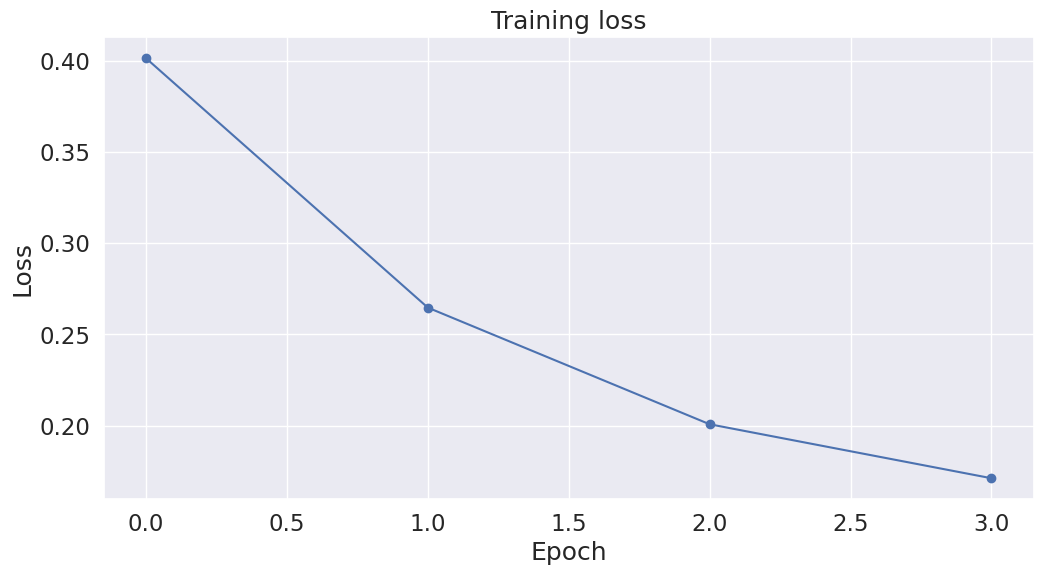

In [ ]:
import matplotlib.pyplot as plt
#% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

#### Test

In [ ]:
tokenizer = BertTokenizer.from_pretrained('./beto-fine-tuning/')

In [ ]:
tokenizer

Using bos_token, but it is not set yet.
Using eos_token, but it is not set yet.


BertTokenizer(name_or_path='./beto-fine-tuning/', vocab_size=31002, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	5: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [ ]:
test_df.iloc[0]['tweet_text']

'Qué tal si ponemos el foco aquí? ¿"Por no ser ocio nocturno"? En serio? Y no solo por una cuestión de salud pública. Por el fondo. Por eso... Tercer brote en un prostíbulo: 1.600 abiertos por no ser ocio nocturno https://t.co/MITvbXOs1H'

In [ ]:
input_ids = tokenizer.encode(test_df.iloc[502]['tweet_text'], add_special_tokens=True, truncation=True, max_length=64, padding=True, return_tensors="pt")

In [ ]:
input_ids

tensor([[    4, 19519,  1039,  1707,  1048,  1136,  7730,  1035,  1032,  1532,
         11412,  1126,  1081,  5092,     3,  1039,  1758,     3,  1008,  1091,
         10113,  1012,  1032,  7810,  1009,  1136,  2771,  3213,     3,  1032,
         15492,  5311,  1035,  1032,  6286,  1001,  1000,     3,  1147, 13656,
          6653,  1135,  1042,  2758,  4146,   995,   989,   989,  1027,  1008,
          1270,   989,  1005, 30968, 31000, 27641, 30995, 30959, 30964,   996,
         30960,     5]])

In [ ]:
import pandas as pd

# Load the dataset into a pandas dataframe
df = test_df

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
sentences = df.tweet_text.values
labels = df.class_label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )

    input_ids.append(encoded_sent)

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN,
                          dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)

# Set the batch size.
batch_size = 32

# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: 7,976



In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables
predictions , true_labels = [], []

# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch

  # Telling the model not to compute or store gradients, saving memory and
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 7,976 test sentences...
    DONE.


In [ ]:
print('Positive samples: %d of %d (%.2f%%)' % (df.class_label.sum(), len(df.class_label), (df.class_label.sum() / len(df.class_label) * 100.0)))

Positive samples: 1129 of 7976 (14.15%)


In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):

  # The predictions for this batch are a 2-column ndarray (one column for "0"
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()

  # Calculate and store the coef for this batch.
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


In [ ]:
matthews_set

[0.0950381926622983,
 0.0,
 0.0,
 0.0,
 0.12403473458920847,
 0.0,
 0.1210898699241207,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.08627959628145762,
 0.0,
 0.07460470969529907,
 0.6831300510639733,
 0.52678658400752,
 0.5447047794019222,
 0.26436781609195403,
 0.5447047794019222,
 1.0,
 0.6050580452280905,
 0.7453559924999299,
 0.5584155773160767,
 0.26436781609195403,
 0.6831300510639733,
 0.394853422012197,
 0.6546536707079772,
 0.52678658400752,
 0.8027729719194864,
 0.5584155773160767,
 0.7867957924694432,
 0.6831300510639733,
 0.6695340634119862,
 0.6,
 0.6,
 0.0,
 0.8783100656536799,
 0.3394221166510653,
 0.5204956780951701,
 0.30261376633440124,
 0.762962962962963,
 0.6831300510639733,
 0.5447047794019222,
 0.7142857142857143,
 0.7948717948717948,
 0.4547940268270977,
 0.7867957924694432,
 0.8027729719194864,
 0.6342857142857142,
 0.6831300510639733,
 0.7867957924694432,
 0.8171428571428572,
 0.8783100656536799,
 0.8320502943378436,
 -0.05776712868787001,
 0.8027729719194864,
 0.52678658

In [ ]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('MCC: %.3f' % mcc)

MCC: 0.523


#### A1. Saving & Loading Fine-Tuned Model

This first cell (taken from `run_glue.py` [here](https://github.com/huggingface/transformers/blob/35ff345fc9df9e777b27903f11fa213e4052595b/examples/run_glue.py#L495)) writes the model and tokenizer out to disk.

In [ ]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './beto-fine-tuning/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))


Saving model to ./beto-fine-tuning/


('./beto-fine-tuning/tokenizer_config.json',
 './beto-fine-tuning/special_tokens_map.json',
 './beto-fine-tuning/vocab.txt',
 './beto-fine-tuning/added_tokens.json')

Let's check out the file sizes, out of curiosity.

In [ ]:
!ls -l --block-size=M ./beto-fine-tuning/

total 420M
-rw------- 1 root root   1M Sep 26 18:51 config.json
-rw------- 1 root root 420M Sep 26 18:51 pytorch_model.bin
-rw------- 1 root root   1M Sep 26 18:51 special_tokens_map.json
-rw------- 1 root root   1M Sep 26 18:51 tokenizer_config.json
-rw------- 1 root root   1M Sep 26 18:51 vocab.txt


The largest file is the model weights, at around 418 megabytes.

In [ ]:
!ls -l --block-size=M ./beto-fine-tuning/pytorch_model.bin

-rw------- 1 root root 420M Sep 26 18:51 ./beto-fine-tuning/pytorch_model.bin


# Dataframes to csv

In [ ]:
# Export to csv
train_df.to_csv('data/train.csv')
dev_df.to_csv('data/dev.csv')
test_df.to_csv('data/test.csv')
del aux_df
del train_df
del dev_df
del test_df

# Pipeline transformers

In [4]:
from sklearn.base import BaseEstimator, TransformerMixin

## EmbeddingsTransformerBase

In [5]:
class EmbeddingsTransformerBase(BaseEstimator, TransformerMixin):
    def print_stats(self):
        total_words = sum(value[0] for value in self.words_stats.values())
        for key, value in self.words_stats.items():
            self.words_stats[key] = [value[0], str(round((value[0]/total_words) * 100, 3))+'%']
        print(self.words_stats, '\n')

## PreprocessingTransformer

In [6]:
import re
import spacy
!python -m spacy download es_core_news_lg

2023-10-27 01:01:51.092392: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-27 01:01:51.092465: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-27 01:01:51.092507: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-27 01:01:52.557033: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 2.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


In [7]:
class PreprocessingTransformer(BaseEstimator, TransformerMixin):

    def __init__(self):
        self.nlp = spacy.load("es_core_news_lg")
        self.tokens_stats = {'USER': [0,0], 'URL': [0,0], 'HASHTAG': [0,0], 'ucc_processed_hashtags': [0,0], 'lemmatized': [0,0]}

    def fit(self,X,y=None):
        return self

    def is_hashtag_upper_camel_case(self, hashtag: str) -> bool:
        pattern = r'[A-Z][a-zA-Z\d]*'
        return re.match(pattern, hashtag) is not None and hashtag != hashtag.upper()

    def is_url(self, text: str) -> str:
        return re.match(r'https?://\S+', text) is not None

    def preprocess_tweet(self, tweet: str) -> str:
        """Function that cleans the tweet text by going to:
        - replace URLs for the special token URL
        - replace usernames for the special token USER
        - remove special characters
        - remove numbers
        - remove stopwords
        - convert to lowercase
        - remove excessive white spaces
        """
        # tokenization
        doc = self.nlp(tweet)

        tokens = []
        for token in doc:
            if token.text.startswith("@"):  # replace all user mentions with the special token "user"
                tokens.append("USER")
                self.tokens_stats['USER'][0] += 1
            elif self.is_url(token.text):
                tokens.append('URL')
                self.tokens_stats['URL'][0] += 1
            elif doc[token.i - 1].text == "#":
                if self.is_hashtag_upper_camel_case(token.text):
                    # splitting hashtags into separate words based on UpperCamelCase
                    splitted_ucc_words = re.findall(r'[A-Z][a-z\d]+', token.text)
                    #tokens.append(f'HASHTAG({len(splitted_ucc_words)})')
                    tokens.append('HASHTAG')
                    self.tokens_stats['HASHTAG'][0] += 1
                    tokens.extend(chunk.lower() for chunk in splitted_ucc_words)
                    self.tokens_stats['ucc_processed_hashtags'][0] += 1
                else:  # not UpperCamelCase
                    tokens.append(f"HASHTAG")
                    self.tokens_stats['HASHTAG'][0] += 1
            elif token.is_stop or not token.is_alpha:  # eliminación de stopwords y caracteres no alfabéticos
                continue
            else:
                tokens.append(token.lemma_.lower())  # lemmatization, case conversion
                self.tokens_stats['lemmatized'][0] += 1

        return tokens

    def print_stats(self):
        total_tokens = sum(value[0] for value in self.tokens_stats.values())
        for key, value in self.tokens_stats.items():
            self.tokens_stats[key] = [value[0], str(round((value[0]/total_tokens) * 100, 3))+'%']
        print(self.tokens_stats)

    def transform(self,X):
        '''Cada row tendrá una lista con todas las features del respectivo tweet'''
        print('preprocessing...')
        to_return = pd.Series([self.preprocess_tweet(tweet) for tweet in X])
        self.print_stats()
        return to_return


### Pruebas phunspell
```
******************** hidden ********************
```

In [ ]:
pspell = phunspell.Phunspell('es')

In [ ]:
pspell.lookup('hola')

True

In [ ]:
import re
wordList = '''awesome day of my life because i am great something some
thing things unclear sun clear hola buen dia'''.split()

wordOr = '|'.join(wordList)

def splitHashTag(hashTag):
    for wordSequence in re.findall('(?:' + wordOr + ')+', hashTag):
        print(':', wordSequence)
        #for word in re.findall(wordOr, wordSequence):
        #    print(word)
        found_words = []
        buffer = ''
        for letter in wordSequence:
            buffer += letter
            if pspell.lookup(buffer):
                found_words.append(buffer)
                buffer = ''
        print(found_words)

for hashTag in '''awesome-dayofmylife iamgreat something
somethingsunclear #holabuendia #HolaBuenDia'''.split():
    print('###', hashTag)
    splitHashTag(hashTag.lower())

### awesome-dayofmylife
: awesome
['a']
: dayofmylife
['d', 'a', 'y', 'o']
### iamgreat
: iamgreat
[]
### something
: something
['so', 'me']
### somethingsunclear
: somethingsunclear
['so', 'me']
### #holabuendia
: holabuendia
['hola', 'bu', 'e']
### #HolaBuenDia
: holabuendia
['hola', 'bu', 'e']


In [ ]:
!pip install phunspell
import phunspell

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 MB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 48.1 MB/s eta 0:00:00
  Created wheel for phunspell: filename=phunspell-0.1.6-py3-none-any.whl size=47556195 sha256=1651ef78b8f6f4922d0efc4b66239a8dbe407e25c1555b2d0f953f51e27564f9
  Stored in directory: /root/.cache/pip/wheels/fd/4b/8b/24576e5451edf7f3f6b15492ace089f4f4353e6289fb923a7d
Successfully built phunspell


## Word2VecTransformer

In [8]:
from gensim.models import Word2Vec

In [9]:
class Word2VecTransformer(EmbeddingsTransformerBase):
    def __init__(self, feature_size=300, window_context=30, min_word_count=1, sample=1e-3, epochs=50):
        self.model = None
        self.feature_size = feature_size
        self.window_context = window_context
        self.min_word_count = min_word_count
        self.sample = sample
        self.epochs = epochs
        self.words_stats = {'present': [0,0], 'not_present': [0,0]}

    def fit(self, X, y=None):
        if self.model is None:
            print('training embedding model...')
            self.model = Word2Vec(
                                    sentences=X,
                                    vector_size=self.feature_size,
                                    window=self.window_context,
                                    min_count=self.min_word_count,
                                    sample=self.sample,
                                    epochs=self.epochs
                            )
            print('training finished.')
        else:
            print('embedding model already fitted.')

        return self

    def average_word_vectors(self, words):
        feature_vector = np.zeros((self.feature_size,),dtype="float64")
        nwords = 0.
        for word in words:
            if word in self.model.wv:
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, self.model.wv[word])
                self.words_stats['present'][0] += 1
            else:
                # print('Word not found in model', word)
                self.words_stats['not_present'][0] += 1
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)
        return feature_vector

    def transform(self, X):
        '''
        Cada row corresponderá a un tweet, y c/u de las feature_size columnas
        será una dimensión del vector (promediado de todas las palabras)
        que representa al tweet entero
        '''
        to_return = pd.DataFrame([self.average_word_vectors(tweet_features) for tweet_features in X])
        self.print_stats()
        return to_return

## WriteWordsTransformer

In [10]:
class WriteWordsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, words_file_path):
        self.words_file_path = words_file_path

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        with open(self.words_file_path, 'w', encoding='utf-8') as file:
            for tweet in X:
                line = ' '.join(tweet)
                file.write(line + '\n')
        print('tokens txt file with one line per tweet written')
        return X

## FastTextBase

In [11]:
!pip install fasttext
import fasttext
import subprocess
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199773 sha256=222fe550a8e0c4b38b887021f627d31aaa28db886b992478dabe15bda968499f
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [12]:
class FastTextBase(BaseEstimator, TransformerMixin):
    def __init__(self, input_file, output_file, dim=300, ws=50, minCount=1, epoch=50, thread=4, t=1e-3):
        # https://fasttext.cc/docs/en/python-module.html#train_unsupervised-parameters
        self.model = None
        self.input_file = input_file  # txt file
        self.output_file = output_file  # bin file
        self.dim = dim  # feature size
        self.ws = ws  # context window
        self.minCount = minCount
        self.epoch = epoch
        self.thread = thread
        self.t = t  # sampling threshold
        self.words_stats = {'present': [0,0], 'not_present': [0,0]}

    def fit(self, X, y=None):
        if self.model is None:
            if os.path.exists(self.output_file):
                self.model = fasttext.load_model(self.output_file)
                print('existing embedding model has been loaded...')
            else:
                print('training embedding model...')
                self.model = fasttext.train_unsupervised(
                                input=self.input_file,
                                dim=self.dim,
                                ws=self.ws,
                                epoch=self.epoch,
                                minCount=self.minCount,
                                thread=self.thread,
                                t=self.t
                            )
                print('training finished.')
                self.model.save_model(self.output_file)
                print('model saved to .bin in ' + self.output_file)
                # bin_to_vec.py download (-nc para descargar solo si no existe el fichero)
                if not os.path.exists('./fasttext/bin_to_vec.py'):
                    os.makedirs('./fasttext', exist_ok=True)
                    os.chdir('./fasttext')
                    subprocess.run([
                        'wget', '-nc',
                        'https://raw.githubusercontent.com/facebookresearch/fastText/master/python/doc/examples/bin_to_vec.py'
                    ])
                    os.chdir('..')
                vec_filename = self.output_file.split('.')[0]+'.vec'
                subprocess.run(['python', './fasttext/bin_to_vec.py', self.output_file, '>', vec_filename], shell=True)
                print('model in .bin converted to .vec for potential later use as input on InferSent')
        else:
            print('embedding model already fitted.')
        return self

## FastTextTransformer

In [13]:
class FastTextTransformer(FastTextBase, EmbeddingsTransformerBase):
    def average_word_vectors(self, words):
        feature_vector = np.zeros((self.dim,),dtype="float64")
        nwords = 0.
        for word in words:
            if word in self.model.words:
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, self.model.get_word_vector(word))
                self.words_stats['present'][0] += 1
            else:
                # print('Word not found in model', word)
                self.words_stats['not_present'][0] += 1
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)
        return feature_vector

    def transform(self, X):
        '''
        Cada row corresponderá a un tweet, y c/u de las feature_size columnas
        será una dimensión del vector (promediado de todas las palabras)
        que representa al tweet entero
        '''
        to_return = pd.DataFrame([self.average_word_vectors(tweet_features) for tweet_features in X])
        self.print_stats()
        return to_return

## FastTextWordVectors

In [14]:
class FastTextWordVectors(FastTextBase):
    def transform(self, X):
        '''
        Aca se evita hacer cualquier transformación.
        Se entrena el modelo, se genera el .bin y
        se lo transforma a .vec para que InferSent lo use como input
        y genera los embeddings
        '''
        return X

## BetoTransformer

In [15]:
!pip install transformers
from transformers import BertTokenizer, TFBertModel
import re
import pandas as pd
import os
import numpy as np
from tqdm.notebook import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.5 MB/s eta 0:00:00


In [16]:
class BetoTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, embeddings_pickle, train_path, test_path):
        self.embeddings_pickle = embeddings_pickle
        self.embeddings = self.get_embeddings()
        self.model = TFBertModel.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased')
        self.tokenizer = BertTokenizer.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased')
        self.train_path = train_path
        self.test_path = test_path

    def load_embeddings(self):
        print('existing embeddings pickle file loaded for transform')
        return pd.read_pickle(self.embeddings_pickle)

    def get_embeddings(self):
        if os.path.exists(self.embeddings_pickle):
            embeddings = self.load_embeddings()
        else:
            train_df = pd.read_csv(self.train_path, index_col='tweet_id')
            test_df = pd.read_csv(self.test_path, index_col='tweet_id')

            train_test_instances = pd.concat([train_df, test_df], ignore_index=False)
            train_test_instances = train_test_instances['tweet_text']

            # Me deshago de las rows repetidas usando su index
            train_test_instances = train_test_instances[~train_test_instances.index.duplicated(keep='first')]
            embeddings = self.calculate_embeddings(X=train_test_instances)

            embeddings.to_pickle(self.embeddings_pickle)

        embeddings.index = embeddings.index.astype(str)
        return embeddings

    def preprocess(self, s): # remove symbols, mask URL, remove digits
        s = re.sub(r'((http|https)\:\/\/)[(\/|\-|\_)*a-zA-Z0-9|\.]+',' ',s.lower())
        # s = re.sub(r'[^a-zA-Z]|_', ' ', s) # remove symbols and digits
        s = re.sub(r'\s+', ' ', s)
        return s

    def calculate_embeddings(self, X):
        tweets = list(X.index)
        matrix = np.zeros((len(X),768)) # creamos la matrix para los embeddings

        for i in tqdm(range(0,len(X))):
            processed_tweet = self.preprocess(X.values[i])
            tokens = self.tokenizer(processed_tweet, return_tensors='tf')
            output = self.model(tokens)
            embedding = np.array(output['last_hidden_state'][0]).mean(0)
            matrix[i] = embedding

        result_df = pd.DataFrame(matrix, index=tweets)
        return result_df

    def fit(self, X, y=None):
        # BERT no requiere fit
        return self

    def transform(self, X, y=None):
        '''
        Cada row corresponderá a un tweet, y c/u de las feature_size columnas
        será una dimensión del vector (promediado de todas las palabras)
        que representa al tweet entero
        '''
        result_df = pd.DataFrame()

        X.index = X.index.astype(str)
        for index, value in X.items():
            if index in self.embeddings.index:
                row = self.embeddings.loc[index]
                result_df = pd.concat([result_df, row.to_frame().T])
            else:
                print(f'embedding for tweet {index} not found')

        result_df.index = X.index

        return result_df

## InfersentTransformer

In [17]:
!wget https://github.com/facebookresearch/InferSent/archive/refs/heads/main.zip
!unzip -n main.zip
!rm main.zip
!mv InferSent-main InferSent
from InferSent.models import InferSent
import torch
import subprocess

--2023-10-27 01:04:29--  https://github.com/facebookresearch/InferSent/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/facebookresearch/InferSent/zip/refs/heads/main [following]
--2023-10-27 01:04:30--  https://codeload.github.com/facebookresearch/InferSent/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.112.10
Connecting to codeload.github.com (codeload.github.com)|140.82.112.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [ <=>                ] 269.30K  --.-KB/s    in 0.09s   

2023-10-27 01:04:30 (2.93 MB/s) - ‘main.zip’ saved [275764]

Archive:  main.zip
31eede6b3543571951276cbbf7040b4f8479985a
   creating: InferSent-main/
  inflating: InferSent-main/.gitignor

In [18]:
class InferSentTransformer(EmbeddingsTransformerBase):
    def __init__(self, w2v_path='fasttext_vectors.vec', bsize=64, word_emb_dim=300, enc_lstm_dim=2048, pool_type='max', dpout_model=0.0, model_version=2):
        self.model = None
        subprocess.run([
            'curl', '-Lo', f'encoder/infersent{model_version}.pkl',
            f'https://dl.fbaipublicfiles.com/infersent/infersent{model_version}.pkl'
        ])
        self.model_path = "encoder/infersent%s.pkl" % model_version  # 1 glove, 2 fasttext
        self.w2v_path = w2v_path
        self.bsize = bsize
        self.word_emb_dim = word_emb_dim
        self.enc_lstm_dim = enc_lstm_dim
        self.pool_type = pool_type
        self.dpout_model = dpout_model
        self.version = model_version  # Version 2 for a FastText input (.vec file)
        self.words_stats = {'present': [0,0], 'not_present': [0,0]}

    def fit(self, X, y=None):
        if self.model is None:
            sentences = [' '.join(tweet_tokens) for tweet_tokens in X]
            print('training embedding model...')
            params_model = {
                'bsize': 64,
                'word_emb_dim': 300,
                'enc_lstm_dim': 2048,
                'pool_type': 'max',
                'dpout_model': 0.0,
                'version': self.version
            }
            self.model = InferSent(params_model)
            self.model.load_state_dict(torch.load(self.model_path))
            self.model.set_w2v_path(self.w2v_path)
            self.model.build_vocab(sentences, tokenize=False)
            print('training finished.')
        else:
            print('embedding model already fitted.')
        return self

    def average_word_vectors(self, words):
        feature_vector = np.zeros((self.word_emb_dim,),dtype="float64")
        nwords = 0.
        for word in words:
            if word in self.model.word_vec:
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, self.model.word_vec[word])
                self.words_stats['present'][0] += 1
            else:
                self.words_stats['not_present'][0] += 1
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)
        return feature_vector

    def transform(self, X):
        '''
        Cada row corresponderá a un tweet, y c/u de las feature_size columnas
        será una dimensión del vector (promediado de todas las palabras)
        que representa al tweet entero
        '''
        to_return = pd.DataFrame([self.average_word_vectors(tweet_features) for tweet_features in X])
        self.print_stats()
        return to_return

## GPTClassifier

In [5]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 1.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [3]:
# Load OpenAI token
!pip install python-dotenv
from dotenv import load_dotenv
import os
load_dotenv()
OPENAI_TOKEN = str(os.getenv('OPENAI_TOKEN'))

In [6]:
import openai
import json
import time
from tqdm.notebook import tqdm
# Set up the openai API key
openai.api_key = OPENAI_TOKEN

In [21]:
from sklearn.base import BaseEstimator, ClassifierMixin

In [22]:
class GPTClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model='gpt-3.5-turbo', temperature=.5, max_tokens=5000, top_p=1, frequency_penalty=0, presence_penalty=0, stop=["12."]):
        self.model = model,
        self.temperature = temperature,
        self.max_tokens = max_tokens,
        self.top_p = top_p,
        self.frequency_penalty = frequency_penalty,
        self.presence_penalty = presence_penalty,
        self.stop = stop

    def fit(self, X, y=None):
        self.classes_ = list(set(y))
        return self

    def predict(self, X):
        '''
        Cada row corresponderá a un tweet, y c/u de las feature_size columnas
        será una dimensión del vector (promediado de todas las palabras)
        que representa al tweet entero
        '''
        # InvalidRequestError: This model's maximum context length is 4097 tokens.
        # However, your messages resulted in 8871 tokens. Please reduce the length of the messages.
        CHUNK_SIZE = 30
        to_return = []

        for i in range(0, len(X.values), CHUNK_SIZE):
            chunk = X.values[i:i + CHUNK_SIZE]

            frases_str = ""
            for idx, frase in enumerate(chunk, start=1):
                frases_str += f"Tweet {idx}:\n{frase.strip()}\n\n"

            #prompt_template = '''Una frase que vale la pena chequear es aquella que amerita ser chequeada en términos de su probable falsedad en la información, su potencial impacto negativo en la sociedad, individuos, compañías o productos, su relevancia general y la necesidad de la intervención de un profesional que se ocupe de chequearla. En ese contexto, vale la pena chequear los siguientes tweets? Necesito que respondas EXACTAMENTE {cantidad_frases} caracteres separados por comas: 1 (afirmativo) o 0 (negativo).\n\n{frases}'''
            prompt_template = '''Una frase que vale la pena chequear es aquella que amerita ser chequeada en términos de su probable falsedad en la información, su potencial impacto negativo en la sociedad, individuos, compañías o productos, su relevancia general y la necesidad de la intervención de un profesional que se ocupe de chequearla. En ese contexto, vale la pena chequear los siguientes tweets? Necesito que respondas EXACTAMENTE {cantidad_frases} pares numero_de_tweet:calificacion, una para cada tweet (por ejemplo, 5:0 si el tweet 5 lleva calificacion 0), separados por comas, considerando 1 (afirmativo) o 0 (negativo).\n\n{frases}'''
            msg_content = prompt_template.format(cantidad_frases=str(len(chunk)), frases=frases_str)

            print(f'pos general {i} de {len(X.values)}')
            print('msg_content')
            print(msg_content)

            p_c = [
                {
                    "role": "user",  # explicacion de frase check-worthy extraido casi textual de la pagina 5 boceto
                    "content": msg_content
                }
            ]


            # response = openai.ChatCompletion.create(
            #     model=self.model,
            #     messages=p_c,
            #     temperature=self.temperature,
            #     max_tokens=self.max_tokens,
            #     top_p=self.top_p,
            #     frequency_penalty=self.frequency_penalty,
            #     presence_penalty=self.presence_penalty,
            #     stop=self.stop
            # )

            flag = False
            while not flag:
                try:
                    response = openai.ChatCompletion.create(
                        model='gpt-3.5-turbo',
                        messages=p_c,
                        temperature=.0,
                        max_tokens=180,
                        top_p=1,
                        frequency_penalty=0,
                        presence_penalty=0,
                        #stop=["12."]
                    )
                    flag = True
                except openai.error.OpenAIError as e:
                    #Handle API error here, e.g. retry or log
                    print(f"OpenAI API returned an API Error: {e}")
                    time.sleep(20)
                    print('Retrying...')

            response_content = response['choices'][0]['message']['content']
            print(response_content)
            chunk_labels = response_content.split('\n') if '\n' in response_content else response_content.split(',')
            print(chunk_labels)
            chunk_labels = [pair.split(':')[-1].strip() for pair in chunk_labels]
            try:
                chunk_labels = [int(label) for label in chunk_labels]
            except:
                import pdb; pdb.set_trace()
            print(chunk_labels)
            to_return.extend(chunk_labels)
            print('labels obtenidos hasta el momento:', len(to_return), '\n', '\n')
            time.sleep(5) # hay un rate limit, esto es porque originalmente lo tenía en un ciclo

        return to_return

# Baselines

## Generic metrics

In [23]:
from IPython.display import display, Markdown

In [24]:
def generate_show_md_table(tabla):
    tabla_md = "|".join(tabla[0]) + "\n" + "|".join(["---"] * len(tabla[0])) + "\n" + "\n".join(["|".join(map(str, fila)) for fila in tabla[1:]])
    display(Markdown(tabla_md))

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, balanced_accuracy_score, matthews_corrcoef

In [26]:
def generate_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=labels
    )
    disp.plot(cmap='Blues')
    plt.show()

In [27]:
def run_metrics(y_true, y_pred, classes):
    generate_confusion_matrix(y_true, y_pred, classes)
    print('\n')

    metrics_results = {
        'precision': precision_score(y_true, y_pred),  # default=binary  # tp / (tp + fp)
        'precision_weighted': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred),  # default=binary  # tp / (tp + fn)
        'recall_weighted': recall_score(y_true, y_pred, average='weighted'),
        'f1': f1_score(y_true, y_pred),  # es default=binary  # 2 * (precision * recall) / (precision + recall)
        'f1_weighted': f1_score(y_true, y_pred, average='weighted'),  # 2 * (precision * recall) / (precision + recall)
        'accuracy': accuracy_score(y_true, y_pred),  # (tp + tn) / (tp + fp + tn + fn)
        'balanced_accuracy': balanced_accuracy_score(y_true, y_pred),  # 1/2 [tp/(tp+fn) + tn/(tn+fp)]
        'mcc [-1,1]': matthews_corrcoef(y_true, y_pred)  # Matthews correlation coefficient  # (tp*tn-fp*fn)/[(tp+fp)(tp+fn)(tn+fp)(fn+fn)]^1/2
    }

    tabla = [
        metrics_results.keys(),
        metrics_results.values()
    ]

    generate_show_md_table(tabla)

    metrics_results = {key: str(value) for key, value in metrics_results.items()}
    return metrics_results

## Generic baseline

In [28]:
import os
import json

RESULTS_FILENAME = "data/final_results.json"
def load_create_or_save_results(final_results:dict=None):
    if final_results:  # si vino uno, lo guardo
        with open(RESULTS_FILENAME, 'w') as file:
            json.dump(final_results, file, indent=4)
        print('\nArchivo de resultados guardado')
        return None

    if os.path.exists(RESULTS_FILENAME):  # if exists, load
        with open(RESULTS_FILENAME, 'r') as file:
            results = json.load(file)
        print('\nArchivo de resultados cargado')
    else:  # if not exists, create
        results = {}
        print('Diccionario de resultados creado')

    return results

In [29]:
final_results = load_create_or_save_results()


Archivo de resultados cargado


In [30]:
final_results

{'random': {'precision': '0.1412904871206325',
  'precision_weighted': '0.7567214984235856',
  'recall': '0.49069973427812225',
  'recall_weighted': '0.5057673019057171',
  'f1': '0.2194059405940594',
  'f1_weighted': '0.5791043887505298',
  'accuracy': '0.5057673019057172',
  'balanced_accuracy': '0.49947576169141983',
  'mcc [-1,1]': '-0.0007310751699104152'},
 'majority': {'precision': '0.0',
  'precision_weighted': '0.7369370052232928',
  'recall': '0.0',
  'recall_weighted': '0.8584503510531595',
  'f1': '0.0',
  'f1_weighted': '0.7930661207125391',
  'accuracy': '0.8584503510531595',
  'balanced_accuracy': '0.5',
  'mcc [-1,1]': '0.0'},
 'beto-fine-tuning': {'precision': '0.5261299435028248',
  'precision_weighted': '0.8826731075996351',
  'recall': '0.6598759964570416',
  'recall_weighted': '0.867728184553661',
  'f1': '0.5854616895874262',
  'f1_weighted': '0.8737705865865772',
  'accuracy': '0.867728184553661',
  'balanced_accuracy': '0.7809384363766149',
  'mcc [-1,1]': '0.51

In [31]:
from sklearn.pipeline import Pipeline

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [33]:
def run_baseline(pipeline, data_fpath, test_fpath, results_fpath, model_name):
    '''Works for every pipeline (or classifier) received by parameter.'''
    train_df = pd.read_csv(data_fpath, index_col='tweet_id')
    test_df = pd.read_csv(test_fpath, index_col='tweet_id')

    pipeline.fit(train_df['tweet_text'], train_df['class_label'])

    with open(results_fpath, "w") as results_file:
        original_index = test_df.index
        predicted = pipeline.predict(test_df['tweet_text'])
        predicted = pd.Series(predicted, index=original_index)

        results_file.write("tweet_id\tclass_label\trun_id\n")

        for i, line in test_df.iterrows():
            label = predicted[i]
            results_file.write("{}\t{}\t{}\n".format(i, label, model_name))

    final_results[model_name] = run_metrics(test_df['class_label'], predicted, pipeline.classes_)
    load_create_or_save_results(final_results)

## Random

In [ ]:
from sklearn.dummy import DummyClassifier

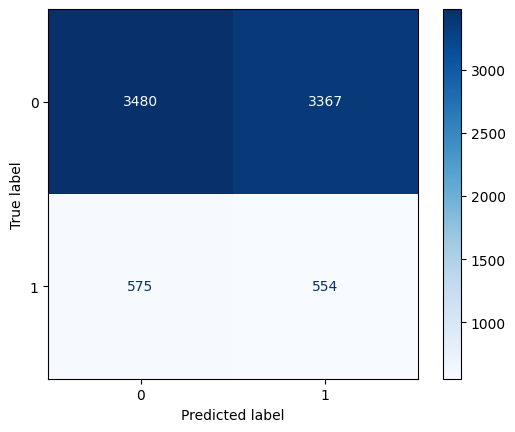

precision|precision_weighted|recall|recall_weighted|f1|f1_weighted|accuracy|balanced_accuracy|mcc [-1,1]
---|---|---|---|---|---|---|---|---
0.1412904871206325|0.7567214984235856|0.49069973427812225|0.5057673019057171|0.2194059405940594|0.5791043887505298|0.5057673019057172|0.49947576169141983|-0.0007310751699104152


Archivo de resultados guardado


In [ ]:
run_baseline(
    pipeline=DummyClassifier(strategy="uniform", random_state=44),
    data_fpath='data/test.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_random.csv',
    model_name='random'
)

## Majority

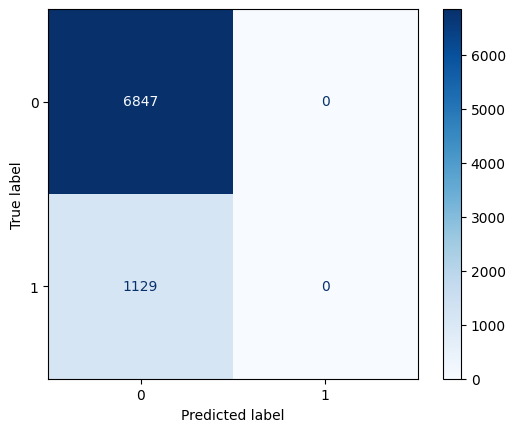

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision|precision_weighted|recall|recall_weighted|f1|f1_weighted|accuracy|balanced_accuracy|mcc [-1,1]
---|---|---|---|---|---|---|---|---
0.0|0.7369370052232928|0.0|0.8584503510531595|0.0|0.7930661207125391|0.8584503510531595|0.5|0.0


Archivo de resultados guardado


In [ ]:
run_baseline(
    pipeline=DummyClassifier(strategy="most_frequent"),
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_majority.csv',
    model_name='majority'
)

## Beto Fine Tuning
```
Al principio pq necesita GPU, y si va a lo último puede fallar porque Colab la desactiva después de un tiempo si está inactiva
```

There are 1 GPU(s) available.
We will use the GPU: Tesla T4
    DONE.
7976 predictions done.


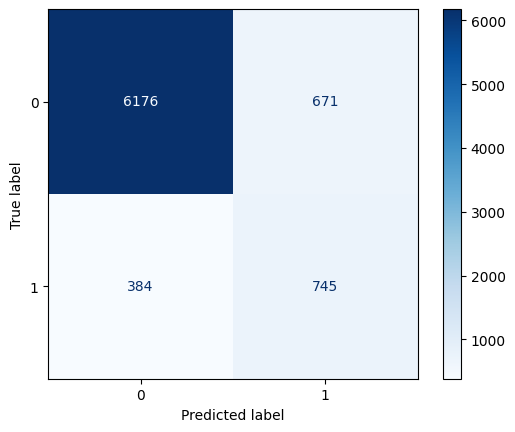

precision|precision_weighted|recall|recall_weighted|f1|f1_weighted|accuracy|balanced_accuracy|mcc [-1,1]
---|---|---|---|---|---|---|---|---
0.5261299435028248|0.8826731075996351|0.6598759964570416|0.867728184553661|0.5854616895874262|0.8737705865865772|0.867728184553661|0.7809384363766149|0.5125718425647104


Archivo de resultados guardado


In [ ]:
pipeline = Pipeline([
    ('generate_embeddings', BetoFineTuningTransformer(model_path='./beto-fine-tuning/',)),
    ('clf', BetoFineTuningClassifier(model_path='./beto-fine-tuning/'))
])

run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_beto-fine-tuning.csv',
    model_name='beto-fine-tuning'
)

## SVM

In [ ]:
from sklearn.svm import SVC

### w/ vectors

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

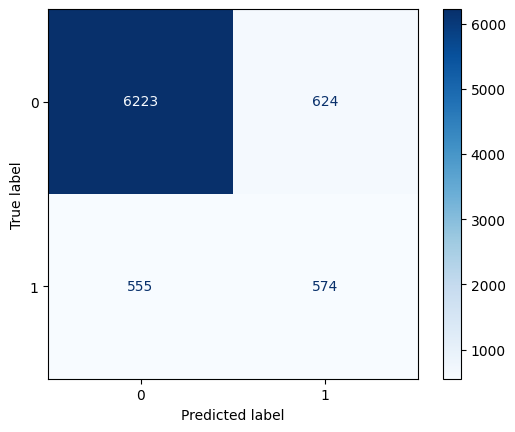

precision|precision_weighted|recall|recall_weighted|f1|f1_weighted|accuracy|balanced_accuracy|mcc [-1,1]
---|---|---|---|---|---|---|---|---
0.4791318864774624|0.855979187952402|0.508414526129318|0.8521815446339017|0.4933390631714654|0.853998801971216|0.8521815446339017|0.7086398612828568|0.40714136148237373


Archivo de resultados guardado


In [ ]:
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 1),lowercase=True,use_idf=True,max_df=0.95, min_df=3,max_features=5000)),  # (1, 1) means only unigrams
    ('clf', SVC(C=1, gamma='scale', kernel='linear', random_state=0))
])
run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_svc_tfidf.csv',
    model_name='svc_tfidf'
)

### w/ embeddings

#### Word2vec

preprocessing...
{'USER': [9860, '4.356%'], 'URL': [13285, '5.87%'], 'HASHTAG': [7311, '3.23%'], 'ucc_processed_hashtags': [5455, '2.41%'], 'lemmatized': [190424, '84.134%']}
training embedding model...
training finished.
{'present': [231910, '100.0%'], 'not_present': [0, '0.0%']} 

preprocessing...
{'USER': [15403, '4.463%'], 'URL': [20897, '6.054%'], 'HASHTAG': [11263, '3.263%'], 'ucc_processed_hashtags': [8150, '2.361%'], 'lemmatized': [289438, '83.858%']}
{'present': [345835, '97.821%'], 'not_present': [7705, '2.179%']} 



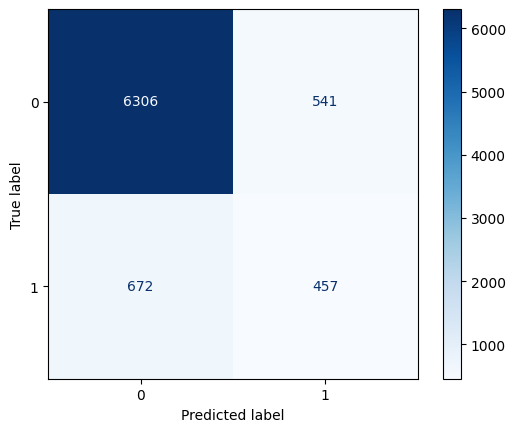

precision|precision_weighted|recall|recall_weighted|f1|f1_weighted|accuracy|balanced_accuracy|mcc [-1,1]
---|---|---|---|---|---|---|---|---
0.45791583166332667|0.8405971192491277|0.40478299379982285|0.8479187562688064|0.42971321109543953|0.843956012947453|0.8479187562688064|0.6628851437525476|0.34322416159133096


Archivo de resultados guardado


In [ ]:
pipeline = Pipeline([
    ('preprocessing', PreprocessingTransformer()),
    ('generate_embeddings', Word2VecTransformer()),
    ('clf', SVC(C=1, gamma='scale', kernel='linear', random_state=0))
])

run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_svc_w2vec.csv',
    model_name='svc_w2vec'
)

##### debug
```
******************** hidden ********************
```

In [ ]:
preprocessed = PreprocessingTransformer().fit_transform(train_df['tweet_text'])

{'USER': 9860, 'URL': 13285, 'HASHTAG': 1856, 'ucc_processed_hashtags': 5455, 'lemmatized': 190424}


In [ ]:
preprocessed

0        [USER, volver, quedar, evidencia, desplazar, m...
1        [curso, escolar, andaluc, comenzar, presupuest...
2        [pp, equivocar, completamente, excluir, vox, m...
3        [definir, USER, necesitar, HASHTAG, movilizar,...
4        [USER, unir, psoe, erc, pacto, cárcel, lledone...
                               ...                        
13425    [organización, médico, alertar, inminente, cat...
13426    [empezar, navalacruz, HASHTAG, USER, anunciar,...
13427    [valiente, presidente, pedro, sánchez, mostrar...
13428    [pp, conformar, retrasar, llegada, ave, extrem...
13429    [razón, congreso, investigar, negocio, oscuro,...
Length: 13430, dtype: object

In [ ]:
embeddings = Word2VecTransformer().fit_transform(X=preprocessed)

training embedding model...
training finished.
{'present': 226455, 'not_present': 0}


In [ ]:
embeddings

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.136143,1.198859,0.102844,0.670876,0.608562,-0.610436,0.658396,0.976333,-0.353578,-0.041321,...,-0.594645,-0.075685,-0.056387,-0.301623,0.273163,-0.024309,-0.054861,-0.111693,0.374118,-0.317363
1,1.009364,0.643523,-0.449479,-0.356971,1.246303,-0.427633,0.019305,0.748654,-0.248010,-0.088318,...,0.221197,-0.095235,0.260573,-0.348216,-0.343339,0.197810,-0.852394,0.256904,-0.247956,-0.873084
2,1.073062,0.676108,0.231484,0.104979,0.493429,-0.181580,-0.988432,0.177865,-0.816469,-0.334149,...,-0.315999,0.436569,-0.339837,0.547689,-0.431410,0.810997,-0.609445,0.964734,1.048878,-1.184155
3,0.397703,-0.021286,0.212271,0.163830,0.360934,-0.090307,-0.103695,0.486036,-0.576798,-0.799049,...,0.131756,0.499056,-0.274106,0.078978,0.118708,0.587428,0.079046,0.011708,0.310015,-0.203577
4,0.412710,0.305507,-0.105287,0.509055,-0.831424,-0.363297,0.218034,0.125422,0.161145,0.303121,...,-0.397113,-0.369610,0.243512,0.036240,0.227276,0.933431,-0.352032,0.130725,0.643481,-0.813416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13425,0.682195,-0.433000,1.080944,0.299886,-0.073971,0.024694,0.584428,0.677398,0.702821,-0.045219,...,-0.617977,-0.009176,-0.149993,-0.060105,0.098064,-0.238124,-0.616518,0.340738,0.891965,-0.089649
13426,1.271502,-0.441212,-0.521667,-0.640687,0.972987,0.233272,0.234564,1.463010,-0.440728,-0.156510,...,-0.149927,0.539346,1.218293,0.842236,0.221457,0.253545,-0.417812,0.175912,-0.090960,0.679411
13427,0.799352,-0.047485,0.497830,0.404130,0.730670,0.027502,0.178912,0.960028,0.265506,-0.653293,...,-0.028366,-0.053193,0.001178,-0.044444,0.292973,0.690024,-0.117678,0.514782,0.248916,-0.131251
13428,1.203742,0.288112,0.210629,0.334030,0.314712,0.077216,-0.293929,0.600684,0.204571,-0.012171,...,-0.499748,0.389335,0.160480,0.335027,-0.159109,-0.102094,-0.282727,0.403959,0.930243,-0.756129


In [ ]:
clf = SVC(C=1, gamma='scale', kernel='linear', random_state=0)

In [ ]:
clf.fit(embeddings, train_df['class_label'])

SVC(C=1, kernel='linear', random_state=0)

#### FastText

preprocessing...
{'USER': [9860, '4.356%'], 'URL': [13285, '5.87%'], 'HASHTAG': [7311, '3.23%'], 'ucc_processed_hashtags': [5455, '2.41%'], 'lemmatized': [190424, '84.134%']}
tokens txt file with one line per tweet written
existing embedding model has been loaded...


{'present': [230536, '99.408%'], 'not_present': [1374, '0.592%']} 

preprocessing...
{'USER': [15403, '4.463%'], 'URL': [20897, '6.054%'], 'HASHTAG': [11263, '3.263%'], 'ucc_processed_hashtags': [8150, '2.361%'], 'lemmatized': [289438, '83.858%']}
tokens txt file with one line per tweet written
{'present': [344004, '97.303%'], 'not_present': [9536, '2.697%']} 



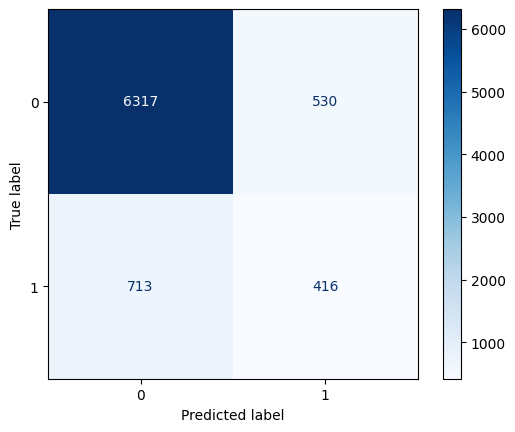

precision|precision_weighted|recall|recall_weighted|f1|f1_weighted|accuracy|balanced_accuracy|mcc [-1,1]
---|---|---|---|---|---|---|---|---
0.4397463002114165|0.8336301261137429|0.36846767050487156|0.8441574724172518|0.4009638554216867|0.8383129504088791|0.8441574724172518|0.6455307536108409|0.31380414666474316


Archivo de resultados guardado


In [ ]:
pipeline = Pipeline([
    ('preprocessing', PreprocessingTransformer()),
    ('write_words', WriteWordsTransformer(words_file_path='fasttext/words.txt')),
    ('generate_embeddings', FastTextTransformer(input_file='fasttext/words.txt', output_file='fasttext/fasttext_vectors.bin')),
    ('clf', SVC(C=1, gamma='scale', kernel='linear', random_state=0))
])

run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_svc_fasttext.csv',
    model_name='svc_fasttext'
)

##### debug
```
******************** hidden ********************
```

In [ ]:
preprocessed = PreprocessingTransformer().fit_transform(train_df['tweet_text'])

{'USER': 9860, 'URL': 13285, 'HASHTAG': 7311, 'ucc_processed_hashtags': 5455, 'lemmatized': 190424}


In [ ]:
preprocessed

NameError: ignored

In [ ]:
write_txt = WriteWordsTransformer(words_file_path='words.txt').fit_transform(preprocessed)

In [ ]:
write_txt

0        [USER, volver, quedar, evidencia, desplazar, m...
1        [curso, escolar, HASHTAG, andaluc, comenzar, p...
2        [pp, equivocar, completamente, excluir, vox, m...
3        [definir, USER, necesitar, HASHTAG, movilizar,...
4        [USER, unir, psoe, erc, pacto, cárcel, lledone...
                               ...                        
13425    [organización, médico, alertar, inminente, cat...
13426    [empezar, HASHTAG, navalacruz, HASHTAG, USER, ...
13427    [valiente, presidente, pedro, sánchez, mostrar...
13428    [pp, conformar, retrasar, llegada, ave, extrem...
13429    [razón, congreso, investigar, negocio, oscuro,...
Length: 13430, dtype: object

In [ ]:
fast_text = FastTextTransformer(input_file='words.txt').fit_transform(write_txt)

training embedding model...
training finished.
{'present': 230536, 'not_present': 1374} 



In [ ]:
fast_text

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.162609,0.004047,-0.030570,0.188806,-0.041817,-0.066666,0.103425,0.022528,0.228482,0.236830,...,0.066723,0.058972,0.039374,-0.212842,-0.099871,0.245727,-0.068138,0.222734,-0.084429,-0.039888
1,0.029636,0.042049,-0.035104,-0.083198,0.310526,0.042431,0.025298,-0.130302,0.266289,0.302042,...,0.203847,0.038836,-0.082839,-0.221324,-0.372195,0.415847,-0.151376,0.047445,-0.001954,-0.001067
2,0.397603,-0.043445,-0.277611,0.146562,0.220969,0.204437,0.038144,0.090433,0.083033,0.119871,...,0.063392,0.061738,-0.232100,-0.051533,-0.051415,0.120700,-0.167367,0.057009,-0.011444,-0.199284
3,0.117122,-0.100161,0.217759,0.191250,0.134466,-0.112763,0.007630,-0.020365,0.010075,0.257586,...,0.285584,-0.075196,-0.192433,0.144148,0.169408,0.298574,0.026356,-0.280185,-0.006560,-0.059705
4,0.232748,-0.085236,-0.042225,0.179983,-0.081720,0.258416,0.130830,0.234119,0.285764,0.501290,...,-0.149685,0.152486,-0.201171,-0.033893,-0.062415,0.159248,-0.168110,-0.020044,0.043277,-0.221435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13425,0.334010,0.052101,0.024725,0.012482,0.323482,0.110838,0.100886,0.045482,0.051761,0.114245,...,0.254418,0.082298,-0.158560,-0.244704,-0.404471,0.321113,-0.240728,-0.376888,-0.215095,-0.087821
13426,0.159492,-0.070031,-0.016941,0.283397,0.156674,0.133760,0.032345,0.013454,0.150969,0.217928,...,0.311288,0.040781,-0.032677,0.207225,-0.013499,0.288247,0.218973,0.046526,-0.148877,-0.119290
13427,-0.032989,-0.133073,0.062337,0.129037,0.040473,0.005688,0.244456,0.051254,0.141944,0.316384,...,0.081827,0.065064,0.031040,-0.075074,-0.011931,0.215555,-0.179394,-0.077281,-0.091264,-0.111639
13428,0.168250,-0.328495,-0.116221,-0.112034,0.102343,0.092179,-0.052729,-0.017757,0.378212,0.246639,...,0.446286,0.356790,0.051509,-0.038846,-0.164810,0.296832,0.037602,0.227062,0.050972,-0.035929


In [ ]:
clf = SVC(C=1, gamma='scale', kernel='linear', random_state=0)

In [ ]:
clf.fit(fast_text, train_df['class_label'])

SVC(C=1, kernel='linear', random_state=0)

In [ ]:
clf.predict(fast_text.iloc[42,4])

ValueError: ignored

#### InferSent

preprocessing...
{'USER': [9860, '4.356%'], 'URL': [13285, '5.87%'], 'HASHTAG': [7311, '3.23%'], 'ucc_processed_hashtags': [5455, '2.41%'], 'lemmatized': [190424, '84.134%']}
tokens txt file with one line per tweet written


existing embedding model has been loaded...
training embedding model...
Found 15865(/15867) words with w2v vectors
Vocab size : 15865
training finished.
{'present': [230536, '99.408%'], 'not_present': [1374, '0.592%']} 

preprocessing...
{'USER': [15403, '4.463%'], 'URL': [20897, '6.054%'], 'HASHTAG': [11263, '3.263%'], 'ucc_processed_hashtags': [8150, '2.361%'], 'lemmatized': [289438, '83.858%']}
tokens txt file with one line per tweet written
{'present': [344004, '97.303%'], 'not_present': [9536, '2.697%']} 



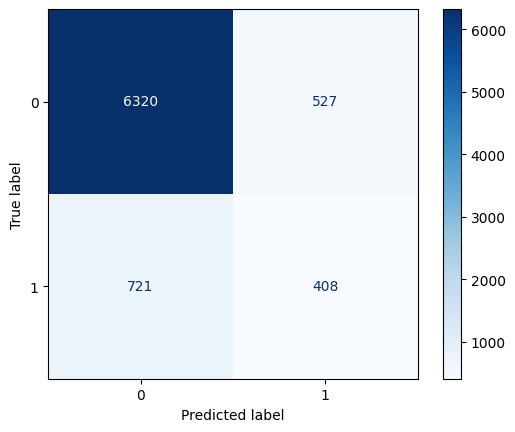

precision|precision_weighted|recall|recall_weighted|f1|f1_weighted|accuracy|balanced_accuracy|mcc [-1,1]
---|---|---|---|---|---|---|---|---
0.43636363636363634|0.8323119595711125|0.36138175376439324|0.843530591775326|0.3953488372093023|0.8372699883489286|0.843530591775326|0.6422068692876297|0.3081943895272343


Archivo de resultados guardado


In [ ]:
pipeline = Pipeline([
    ('preprocessing', PreprocessingTransformer()),
    ('write_words', WriteWordsTransformer(words_file_path='fasttext/words.txt')),
    ('generate_vec_file', FastTextWordVectors(input_file='fasttext/words.txt', output_file='fasttext/fasttext_vectors.bin')),
    ('generate_embeddings', InferSentTransformer(w2v_path='fasttext/fasttext_vectors.vec', model_version=2)),
    ('clf', SVC(C=1, gamma='scale', kernel='linear', random_state=0))
])

run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_svc_infersent.csv',
    model_name='svc_infersent'
)

##### debug
```
******************** hidden ********************
```

In [ ]:
preprocessed = PreprocessingTransformer().fit_transform(train_df['tweet_text'])

preprocessing...
{'USER': [9860, '4.356%'], 'URL': [13285, '5.87%'], 'HASHTAG': [7311, '3.23%'], 'ucc_processed_hashtags': [5455, '2.41%'], 'lemmatized': [190424, '84.134%']}


In [ ]:
preprocessed

0        [USER, volver, quedar, evidencia, desplazar, m...
1        [curso, escolar, HASHTAG, andaluc, comenzar, p...
2        [pp, equivocar, completamente, excluir, vox, m...
3        [definir, USER, necesitar, HASHTAG, movilizar,...
4        [USER, unir, psoe, erc, pacto, cárcel, lledone...
                               ...                        
13425    [organización, médico, alertar, inminente, cat...
13426    [empezar, HASHTAG, navalacruz, HASHTAG, USER, ...
13427    [valiente, presidente, pedro, sánchez, mostrar...
13428    [pp, conformar, retrasar, llegada, ave, extrem...
13429    [razón, congreso, investigar, negocio, oscuro,...
Length: 13430, dtype: object

In [ ]:
write_txt = WriteWordsTransformer(words_file_path='words.txt').fit_transform(preprocessed)

tokens txt file with one line per tweet written


In [ ]:
write_txt

0        [USER, volver, quedar, evidencia, desplazar, m...
1        [curso, escolar, HASHTAG, andaluc, comenzar, p...
2        [pp, equivocar, completamente, excluir, vox, m...
3        [definir, USER, necesitar, HASHTAG, movilizar,...
4        [USER, unir, psoe, erc, pacto, cárcel, lledone...
                               ...                        
13425    [organización, médico, alertar, inminente, cat...
13426    [empezar, HASHTAG, navalacruz, HASHTAG, USER, ...
13427    [valiente, presidente, pedro, sánchez, mostrar...
13428    [pp, conformar, retrasar, llegada, ave, extrem...
13429    [razón, congreso, investigar, negocio, oscuro,...
Length: 13430, dtype: object

In [ ]:
fast_text_get_vec = FastTextWordVectors(input_file='words.txt').fit_transform(write_txt)

training embedding model...
training finished.


In [ ]:
infersent = InferSentTransformer(w2v_path='fasttext_vectors.vec', model_version=2).fit_transform(fast_text_get_vec)

training embedding model...
Found 15865(/15867) words with w2v vectors
Vocab size : 15865
training finished.
{'present': [230536, '99.408%'], 'not_present': [1374, '0.592%']}


In [ ]:
clf = SVC(C=1, gamma='scale', kernel='linear', random_state=0)

In [ ]:
clf.fit(infersent, train_df['class_label'])

SVC(C=1, kernel='linear', random_state=0)

In [ ]:
clf.predict(infersent.iloc[42])

ValueError: ignored

#### Beto

existing embeddings pickle file loaded for transform


Some layers from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert/pooler/dense/bias:0', 'bert/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


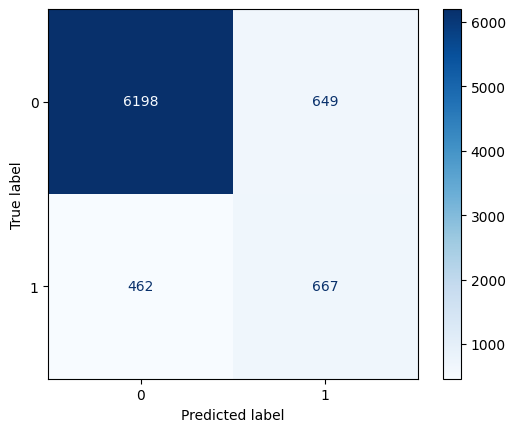

precision|precision_weighted|recall|recall_weighted|f1|f1_weighted|accuracy|balanced_accuracy|mcc [-1,1]
---|---|---|---|---|---|---|---|---
0.506838905775076|0.8706430607507508|0.5907883082373782|0.8607071213640923|0.54560327198364|0.8650696311615413|0.8607071213640923|0.748001135278321|0.46581743565112727


Archivo de resultados guardado


In [ ]:
pipeline = Pipeline([
    ('generate_embeddings', BetoTransformer(
        embeddings_pickle='beto/tweets_embeddings_bert.pickle',
        train_path='data/train.csv',
        test_path='data/test.csv'
    )),
    ('clf', SVC(C=1, gamma='scale', kernel='linear', random_state=0))
])

run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_svc_beto.csv',
    model_name='svc_beto'
)

##### debug
```
******************** hidden ********************
```

In [ ]:
beto = BetoTransformer(embeddings_pickle='beto/train_df_tweets_embeddings_bert.pickle').fit(train_df['tweet_text'], train_df['class_label'])

Some layers from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert/pooler/dense/bias:0', 'bert/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
beto.predict(test_df['tweet_text'])

AttributeError: ignored

In [ ]:
clf = SVC(C=1, gamma='scale', kernel='linear', random_state=0).fit(beto, train_df['class_label'])

In [ ]:
beto = BetoTransformer(embeddings_pickle='beto/train_df_tweets_embeddings_bert.pickle').transform(test_df['tweet_text'])

Some layers from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert/pooler/dense/kernel:0', 'bert/pooler/dense/bias:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


existing embeddings pickle file loaded for transform in training


In [ ]:
clf.predict(beto)

array([0, 1, 0, ..., 1, 1, 0])

## Ejemplo Tfidf
```
******************** hidden ********************
```

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
corpus = [
    'Este es el primer documento.',
    'Este documento es el segundo documento.',
    'Y este es el tercero.',
    'Es este el primer documento?',
    'El primer documento es asi loco',
    'Este documento es el ultimo, es para ser leido por los verdaderos inteligentes de la clase'
]

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,1))

In [ ]:
X = vectorizer.fit_transform(corpus)  # matrix of (n_samples, n_features)

In [ ]:
X

<6x20 sparse matrix of type '<class 'numpy.float64'>'
	with 40 stored elements in Compressed Sparse Row format>

In [ ]:
X.shape  # 6 sentences, 20 features

(6, 20)

In [ ]:
vectorizer.get_feature_names_out()

array(['asi', 'clase', 'de', 'documento', 'el', 'es', 'este',
       'inteligentes', 'la', 'leido', 'loco', 'los', 'para', 'por',
       'primer', 'segundo', 'ser', 'tercero', 'ultimo', 'verdaderos'],
      dtype=object)

## Naive Bayes

### w/ vectors

In [33]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
from sklearn.naive_bayes import GaussianNB

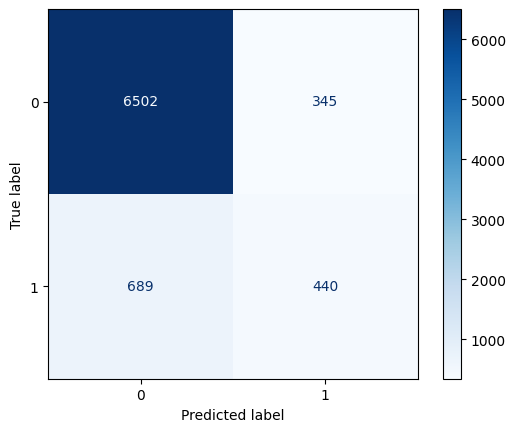

precision|precision_weighted|recall|recall_weighted|f1|f1_weighted|accuracy|balanced_accuracy|mcc [-1,1]
---|---|---|---|---|---|---|---|---
0.5605095541401274|0.85553853756574|0.38972542072630645|0.8703610832497493|0.4597701149425287|0.8602995863771404|0.8703610832497493|0.6696691949549453|0.3971007040151088


Archivo de resultados guardado


In [ ]:
pipeline = Pipeline([
    ('tdidf_vectorizer', TfidfVectorizer(ngram_range=(1, 1),lowercase=True,use_idf=True,max_df=0.95, min_df=3,max_features=5000)),  # (1, 1) means only unigrams
    ('clf', MultinomialNB())
])
run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_bayes_tfidf.csv',
    model_name='bayes_tfidf'
)

### w/ embeddings

#### Word2vec

In [ ]:
from sklearn.preprocessing import MinMaxScaler

preprocessing...
{'USER': [9860, '4.356%'], 'URL': [13285, '5.87%'], 'HASHTAG': [7311, '3.23%'], 'ucc_processed_hashtags': [5455, '2.41%'], 'lemmatized': [190424, '84.134%']}
training embedding model...
training finished.
{'present': [231910, '100.0%'], 'not_present': [0, '0.0%']} 

preprocessing...
{'USER': [15403, '4.463%'], 'URL': [20897, '6.054%'], 'HASHTAG': [11263, '3.263%'], 'ucc_processed_hashtags': [8150, '2.361%'], 'lemmatized': [289438, '83.858%']}
{'present': [345835, '97.821%'], 'not_present': [7705, '2.179%']} 



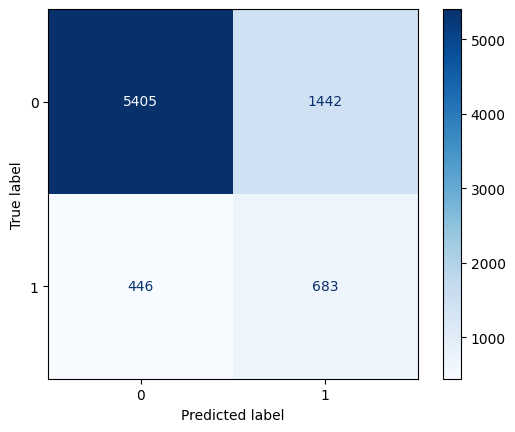

precision|precision_weighted|recall|recall_weighted|f1|f1_weighted|accuracy|balanced_accuracy|mcc [-1,1]
---|---|---|---|---|---|---|---|---
0.32141176470588234|0.8385095914483979|0.6049601417183348|0.7632898696088265|0.41979102642901045|0.7902330770278765|0.7632898696088265|0.6971784789210923|0.3109511206735682


Archivo de resultados guardado


In [ ]:
# agrego MinMaxScaler antes de clf para escalar al rango [0, 1]
# y evitar los negativos

pipeline = Pipeline([
    ('preprocessing', PreprocessingTransformer()),
    ('word2vec', Word2VecTransformer()),
    ('scaler', MinMaxScaler()),
    ('clf', GaussianNB())
])


run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_bayes_w2vec.csv',
    model_name='bayes_w2vec'
)

#### FastText

preprocessing...
{'USER': [9860, '4.356%'], 'URL': [13285, '5.87%'], 'HASHTAG': [7311, '3.23%'], 'ucc_processed_hashtags': [5455, '2.41%'], 'lemmatized': [190424, '84.134%']}
tokens txt file with one line per tweet written


existing embedding model has been loaded...
{'present': [230536, '99.408%'], 'not_present': [1374, '0.592%']} 

preprocessing...
{'USER': [15403, '4.463%'], 'URL': [20897, '6.054%'], 'HASHTAG': [11263, '3.263%'], 'ucc_processed_hashtags': [8150, '2.361%'], 'lemmatized': [289438, '83.858%']}
tokens txt file with one line per tweet written
{'present': [344004, '97.303%'], 'not_present': [9536, '2.697%']} 



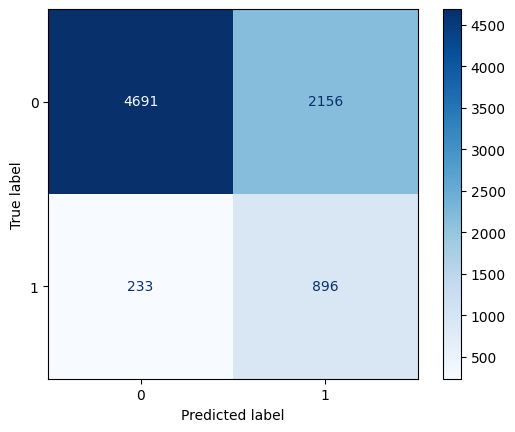

precision|precision_weighted|recall|recall_weighted|f1|f1_weighted|accuracy|balanced_accuracy|mcc [-1,1]
---|---|---|---|---|---|---|---|---
0.29357798165137616|0.859384982253941|0.7936226749335695|0.7004764292878636|0.4286055967471897|0.7448913142573408|0.7004764292878636|0.7393701223360706|0.3433569049538607


Archivo de resultados guardado


In [35]:
pipeline = Pipeline([
    ('preprocessing', PreprocessingTransformer()),
    ('write_words', WriteWordsTransformer(words_file_path='fasttext/words.txt')),
    ('generate_embeddings', FastTextTransformer(input_file='fasttext/words.txt', output_file='fasttext/fasttext_vectors.bin')),
    ('clf', GaussianNB())
])

run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_bayes_fasttext.csv',
    model_name='bayes_fasttext'
)

#### InferSent

preprocessing...
{'USER': [9860, '4.356%'], 'URL': [13285, '5.87%'], 'HASHTAG': [7311, '3.23%'], 'ucc_processed_hashtags': [5455, '2.41%'], 'lemmatized': [190424, '84.134%']}
tokens txt file with one line per tweet written


existing embedding model has been loaded...
training embedding model...
Found 15865(/15867) words with w2v vectors
Vocab size : 15865
training finished.
{'present': [230536, '99.408%'], 'not_present': [1374, '0.592%']} 

preprocessing...
{'USER': [15403, '4.463%'], 'URL': [20897, '6.054%'], 'HASHTAG': [11263, '3.263%'], 'ucc_processed_hashtags': [8150, '2.361%'], 'lemmatized': [289438, '83.858%']}
tokens txt file with one line per tweet written
{'present': [344004, '97.303%'], 'not_present': [9536, '2.697%']} 



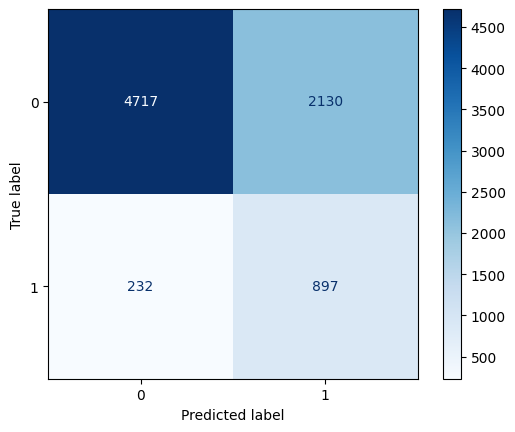

precision|precision_weighted|recall|recall_weighted|f1|f1_weighted|accuracy|balanced_accuracy|mcc [-1,1]
---|---|---|---|---|---|---|---|---
0.29633300297324083|0.8601536130873361|0.7945084145261293|0.7038615847542627|0.43166506256015397|0.7476585497529419|0.7038615847542627|0.7417116338732589|0.3472639870433207


Archivo de resultados guardado


In [36]:
pipeline = Pipeline([
    ('preprocessing', PreprocessingTransformer()),
    ('write_words', WriteWordsTransformer(words_file_path='fasttext/words.txt')),
    ('generate_vec_file', FastTextWordVectors(input_file='fasttext/words.txt', output_file='fasttext/fasttext_vectors.bin')),
    ('generate_embeddings', InferSentTransformer(w2v_path='fasttext/fasttext_vectors.vec', model_version=2)),
    #('scaler', MinMaxScaler()),
    #('clf', MultinomialNB())
    ('clf', GaussianNB())
])

run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_bayes_infersent.csv',
    model_name='bayes_infersent'
)

#### Beto

existing embeddings pickle file loaded for transform


Some layers from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert/pooler/dense/bias:0', 'bert/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


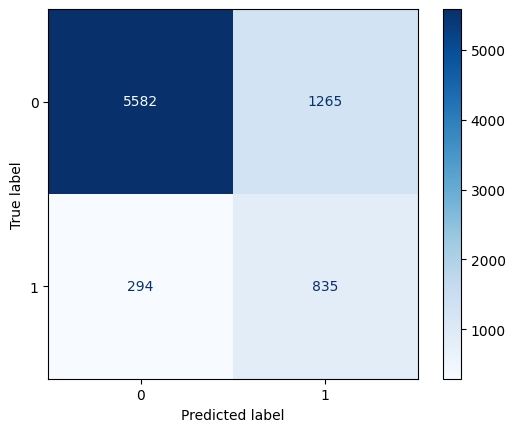

precision|precision_weighted|recall|recall_weighted|f1|f1_weighted|accuracy|balanced_accuracy|mcc [-1,1]
---|---|---|---|---|---|---|---|---
0.3976190476190476|0.8717814512372412|0.7395925597874224|0.8045386158475426|0.517187983895943|0.8264687788299369|0.8045386158475426|0.777420056730282|0.4391515761811536


Archivo de resultados guardado


In [37]:
pipeline = Pipeline([
    ('generate_embeddings', BetoTransformer(
        embeddings_pickle='beto/tweets_embeddings_bert.pickle',
        train_path='data/train.csv',
        test_path='data/test.csv'
    )),
    ('clf', GaussianNB())
])

run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_bayes_beto.csv',
    model_name='bayes_beto'
)

## Random Forest

### w/ vectors

In [38]:
from sklearn.ensemble import RandomForestClassifier

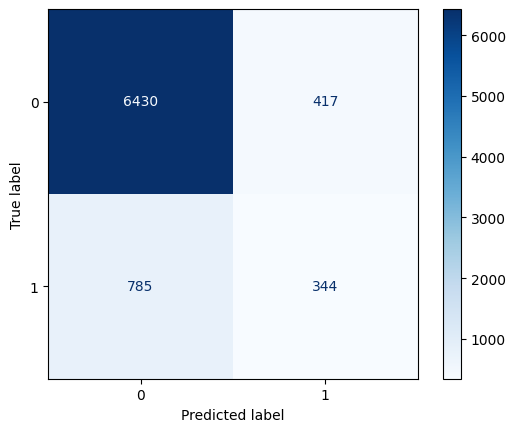

precision|precision_weighted|recall|recall_weighted|f1|f1_weighted|accuracy|balanced_accuracy|mcc [-1,1]
---|---|---|---|---|---|---|---|---
0.4520367936925099|0.8290356504661046|0.3046944198405669|0.8492978936810431|0.364021164021164|0.836598289320722|0.8492978936810431|0.621895917383406|0.2892715979440739


Archivo de resultados guardado


In [41]:
pipeline = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer(ngram_range=(1, 1),lowercase=True,use_idf=True,max_df=0.95, min_df=3,max_features=5000)),  # (1, 1) means only unigrams
    ('clf', RandomForestClassifier())
])
run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_random_forest_tfidf.csv',
    model_name='random_forest_tfidf'
)

### w/ embeddings

#### Word2vec

preprocessing...
{'USER': [9860, '4.356%'], 'URL': [13285, '5.87%'], 'HASHTAG': [7311, '3.23%'], 'ucc_processed_hashtags': [5455, '2.41%'], 'lemmatized': [190424, '84.134%']}
training embedding model...
training finished.
{'present': [231910, '100.0%'], 'not_present': [0, '0.0%']} 

preprocessing...
{'USER': [15403, '4.463%'], 'URL': [20897, '6.054%'], 'HASHTAG': [11263, '3.263%'], 'ucc_processed_hashtags': [8150, '2.361%'], 'lemmatized': [289438, '83.858%']}
{'present': [345835, '97.821%'], 'not_present': [7705, '2.179%']} 



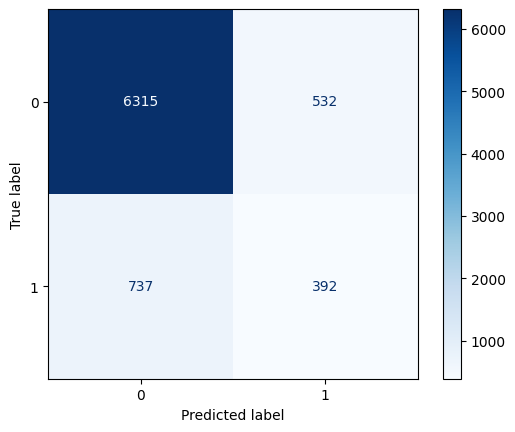

precision|precision_weighted|recall|recall_weighted|f1|f1_weighted|accuracy|balanced_accuracy|mcc [-1,1]
---|---|---|---|---|---|---|---|---
0.42424242424242425|0.8287856213107258|0.34720992028343667|0.8408976930792377|0.3818801753531417|0.8341275232012716|0.8408976930792377|0.6347558291354383|0.29355031698982675


Archivo de resultados guardado


In [42]:
pipeline = Pipeline([
    ('preprocessing', PreprocessingTransformer()),
    ('word2vec', Word2VecTransformer()),
    ('clf', RandomForestClassifier())
])
run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_random_forest_w2vec.csv',
    model_name='random_forest_w2vec'
)

#### FastText

preprocessing...
{'USER': [9860, '4.356%'], 'URL': [13285, '5.87%'], 'HASHTAG': [7311, '3.23%'], 'ucc_processed_hashtags': [5455, '2.41%'], 'lemmatized': [190424, '84.134%']}
tokens txt file with one line per tweet written


existing embedding model has been loaded...
{'present': [230536, '99.408%'], 'not_present': [1374, '0.592%']} 

preprocessing...
{'USER': [15403, '4.463%'], 'URL': [20897, '6.054%'], 'HASHTAG': [11263, '3.263%'], 'ucc_processed_hashtags': [8150, '2.361%'], 'lemmatized': [289438, '83.858%']}
tokens txt file with one line per tweet written
{'present': [344004, '97.303%'], 'not_present': [9536, '2.697%']} 



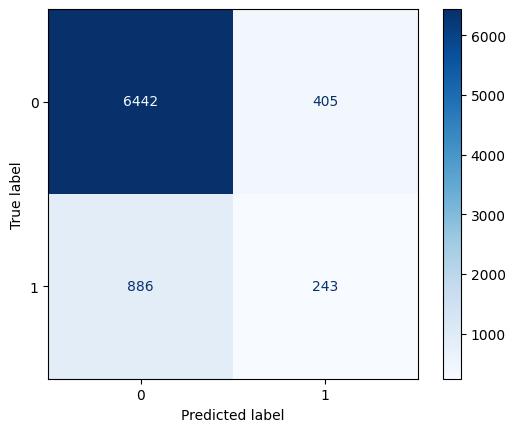

precision|precision_weighted|recall|recall_weighted|f1|f1_weighted|accuracy|balanced_accuracy|mcc [-1,1]
---|---|---|---|---|---|---|---|---
0.375|0.8077395737978126|0.21523472099202834|0.8381394182547643|0.27349465391108607|0.8189793384205979|0.8381394182547643|0.5780423641472483|0.1991486259803256


Archivo de resultados guardado


In [43]:
pipeline = Pipeline([
    ('preprocessing', PreprocessingTransformer()),
    ('write_words', WriteWordsTransformer(words_file_path='fasttext/words.txt')),
    ('generate_embeddings', FastTextTransformer(input_file='fasttext/words.txt', output_file='fasttext/fasttext_vectors.bin')),
    ('clf', RandomForestClassifier())
])

run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_random_forest_fasttext.csv',
    model_name='random_forest_fasttext'
)

#### InferSent

preprocessing...
{'USER': [9860, '4.356%'], 'URL': [13285, '5.87%'], 'HASHTAG': [7311, '3.23%'], 'ucc_processed_hashtags': [5455, '2.41%'], 'lemmatized': [190424, '84.134%']}
tokens txt file with one line per tweet written


existing embedding model has been loaded...
training embedding model...
Found 15865(/15867) words with w2v vectors
Vocab size : 15865
training finished.
{'present': [230536, '99.408%'], 'not_present': [1374, '0.592%']} 

preprocessing...
{'USER': [15403, '4.463%'], 'URL': [20897, '6.054%'], 'HASHTAG': [11263, '3.263%'], 'ucc_processed_hashtags': [8150, '2.361%'], 'lemmatized': [289438, '83.858%']}
tokens txt file with one line per tweet written
{'present': [344004, '97.303%'], 'not_present': [9536, '2.697%']} 



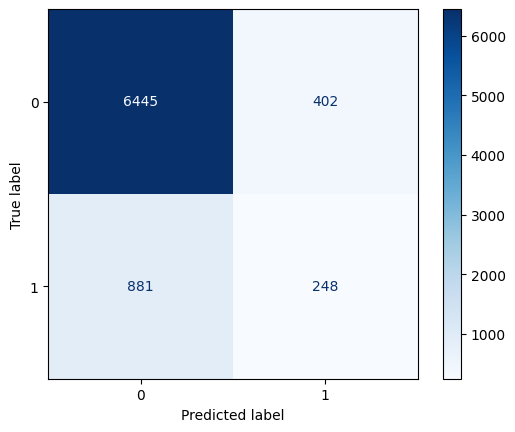

precision|precision_weighted|recall|recall_weighted|f1|f1_weighted|accuracy|balanced_accuracy|mcc [-1,1]
---|---|---|---|---|---|---|---|---
0.38153846153846155|0.8092226484678843|0.21966341895482727|0.8391424272818455|0.27880831928049465|0.8202050084056267|0.8391424272818455|0.5804757871756756|0.20507004584710134


Archivo de resultados guardado


In [44]:
pipeline = Pipeline([
    ('preprocessing', PreprocessingTransformer()),
    ('write_words', WriteWordsTransformer(words_file_path='fasttext/words.txt')),
    ('generate_vec_file', FastTextWordVectors(input_file='fasttext/words.txt', output_file='fasttext/fasttext_vectors.bin')),
    ('generate_embeddings', InferSentTransformer(w2v_path='fasttext/fasttext_vectors.vec', model_version=2)),
    ('clf', RandomForestClassifier())
])

run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_random_forest_infersent.csv',
    model_name='random_forest_infersent'
)

#### Beto

existing embeddings pickle file loaded for transform


Some layers from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert/pooler/dense/bias:0', 'bert/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


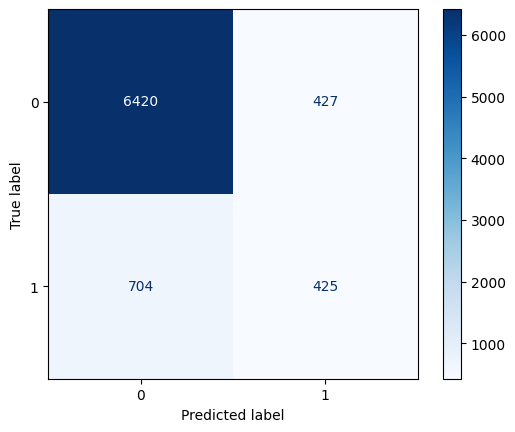

precision|precision_weighted|recall|recall_weighted|f1|f1_weighted|accuracy|balanced_accuracy|mcc [-1,1]
---|---|---|---|---|---|---|---|---
0.4988262910798122|0.8442262121824795|0.37643932683790965|0.8581995987963892|0.4290762241292277|0.8496914623149059|0.8581995987963892|0.657038124058651|0.354446323856542


Archivo de resultados guardado


In [45]:
pipeline = Pipeline([
    ('generate_embeddings', BetoTransformer(
        embeddings_pickle='beto/tweets_embeddings_bert.pickle',
        train_path='data/train.csv',
        test_path='data/test.csv'
    )),
    ('clf', RandomForestClassifier())
])

run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_random_forest_beto.csv',
    model_name='random_forest_beto'
)

## Logistic Regression

### w/ vectors

In [46]:
from sklearn.linear_model import LogisticRegression

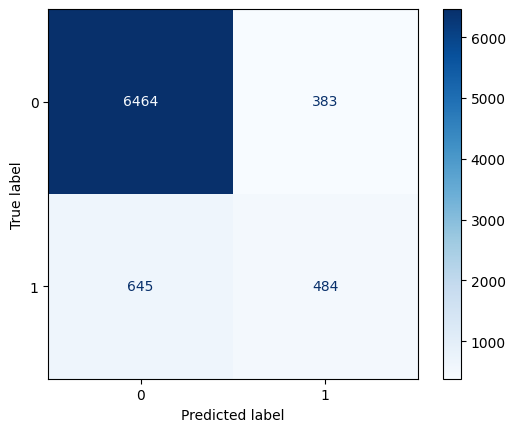

precision|precision_weighted|recall|recall_weighted|f1|f1_weighted|accuracy|balanced_accuracy|mcc [-1,1]
---|---|---|---|---|---|---|---|---
0.558246828143022|0.8595827413266035|0.4286979627989371|0.8711133400200601|0.4849699398797595|0.8638641589626828|0.8711133400200601|0.6863805280622406|0.4174590328013895


Archivo de resultados guardado


In [47]:
pipeline = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer(ngram_range=(1, 1),lowercase=True,use_idf=True,max_df=0.95, min_df=3,max_features=5000)),  # (1, 1) means only unigrams
    ('clf', LogisticRegression())
])
run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_logistic_regression_tfidf.csv',
    model_name='logistic_regression_tfidf'
)

### w/ embeddings

#### Word2vec

preprocessing...
{'USER': [9860, '4.356%'], 'URL': [13285, '5.87%'], 'HASHTAG': [7311, '3.23%'], 'ucc_processed_hashtags': [5455, '2.41%'], 'lemmatized': [190424, '84.134%']}
training embedding model...
training finished.
{'present': [231910, '100.0%'], 'not_present': [0, '0.0%']} 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


preprocessing...
{'USER': [15403, '4.463%'], 'URL': [20897, '6.054%'], 'HASHTAG': [11263, '3.263%'], 'ucc_processed_hashtags': [8150, '2.361%'], 'lemmatized': [289438, '83.858%']}
{'present': [345835, '97.821%'], 'not_present': [7705, '2.179%']} 



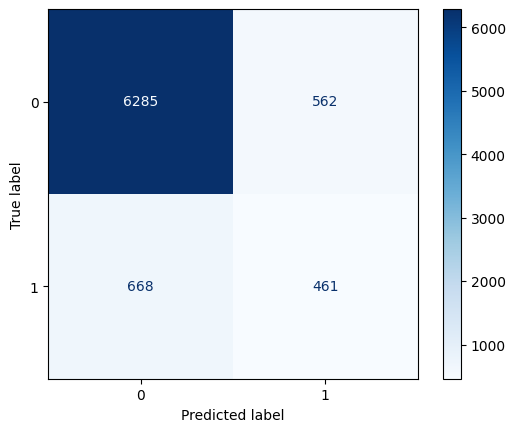

precision|precision_weighted|recall|recall_weighted|f1|f1_weighted|accuracy|balanced_accuracy|mcc [-1,1]
---|---|---|---|---|---|---|---|---
0.4506353861192571|0.8397631841123624|0.408325952170062|0.8457873620862588|0.42843866171003714|0.8425816401848183|0.8457873620862588|0.6631231046084719|0.34010943311308733


Archivo de resultados guardado


In [48]:
pipeline = Pipeline([
    ('preprocessing', PreprocessingTransformer()),
    ('word2vec', Word2VecTransformer()),
    ('clf', LogisticRegression())
])
run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_logistic_regression_w2vec.csv',
    model_name='logistic_regression_w2v'
)

#### FastText

preprocessing...
{'USER': [9860, '4.356%'], 'URL': [13285, '5.87%'], 'HASHTAG': [7311, '3.23%'], 'ucc_processed_hashtags': [5455, '2.41%'], 'lemmatized': [190424, '84.134%']}
tokens txt file with one line per tweet written


existing embedding model has been loaded...
{'present': [230536, '99.408%'], 'not_present': [1374, '0.592%']} 

preprocessing...
{'USER': [15403, '4.463%'], 'URL': [20897, '6.054%'], 'HASHTAG': [11263, '3.263%'], 'ucc_processed_hashtags': [8150, '2.361%'], 'lemmatized': [289438, '83.858%']}
tokens txt file with one line per tweet written
{'present': [344004, '97.303%'], 'not_present': [9536, '2.697%']} 



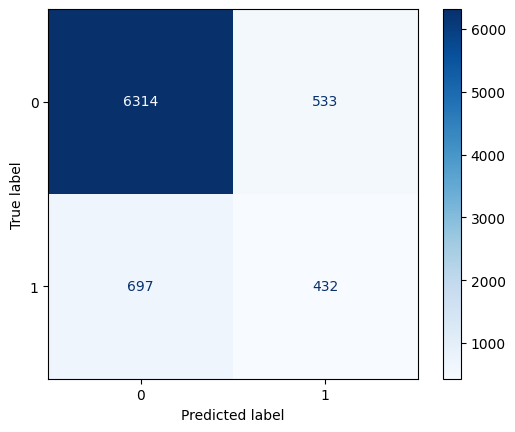

precision|precision_weighted|recall|recall_weighted|f1|f1_weighted|accuracy|balanced_accuracy|mcc [-1,1]
---|---|---|---|---|---|---|---|---
0.44766839378238343|0.8364746376814897|0.3826395039858282|0.8457873620862588|0.4126074498567335|0.8406609725924182|0.8457873620862588|0.6523975963042914|0.3258003957172447


Archivo de resultados guardado


In [49]:
pipeline = Pipeline([
    ('preprocessing', PreprocessingTransformer()),
    ('write_words', WriteWordsTransformer(words_file_path='fasttext/words.txt')),
    ('generate_embeddings', FastTextTransformer(input_file='fasttext/words.txt', output_file='fasttext/fasttext_vectors.bin')),
    ('clf', LogisticRegression())
])

run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_logistic_regression_fasttext.csv',
    model_name='logistic_regression_fasttext'
)

#### InferSent

preprocessing...
{'USER': [9860, '4.356%'], 'URL': [13285, '5.87%'], 'HASHTAG': [7311, '3.23%'], 'ucc_processed_hashtags': [5455, '2.41%'], 'lemmatized': [190424, '84.134%']}
tokens txt file with one line per tweet written


existing embedding model has been loaded...
training embedding model...
Found 15865(/15867) words with w2v vectors
Vocab size : 15865
training finished.
{'present': [230536, '99.408%'], 'not_present': [1374, '0.592%']} 

preprocessing...
{'USER': [15403, '4.463%'], 'URL': [20897, '6.054%'], 'HASHTAG': [11263, '3.263%'], 'ucc_processed_hashtags': [8150, '2.361%'], 'lemmatized': [289438, '83.858%']}
tokens txt file with one line per tweet written
{'present': [344004, '97.303%'], 'not_present': [9536, '2.697%']} 



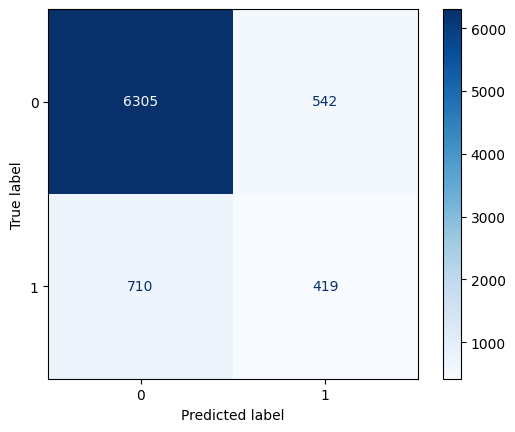

precision|precision_weighted|recall|recall_weighted|f1|f1_weighted|accuracy|balanced_accuracy|mcc [-1,1]
---|---|---|---|---|---|---|---|---
0.43600416233090533|0.8332813770139753|0.37112488928255094|0.8430290872617854|0.4009569377990431|0.837671410078858|0.8430290872617854|0.645983066811569|0.31264686778417317


Archivo de resultados guardado


In [50]:
pipeline = Pipeline([
    ('preprocessing', PreprocessingTransformer()),
    ('write_words', WriteWordsTransformer(words_file_path='fasttext/words.txt')),
    ('generate_vec_file', FastTextWordVectors(input_file='fasttext/words.txt', output_file='fasttext/fasttext_vectors.bin')),
    ('generate_embeddings', InferSentTransformer(w2v_path='fasttext/fasttext_vectors.vec', model_version=2)),
    ('clf', LogisticRegression())
])

run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_logistic_regression_infersent.csv',
    model_name='logistic_regression_infersent'
)

#### Beto

existing embeddings pickle file loaded for transform


Some layers from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert/pooler/dense/bias:0', 'bert/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: Convergenc

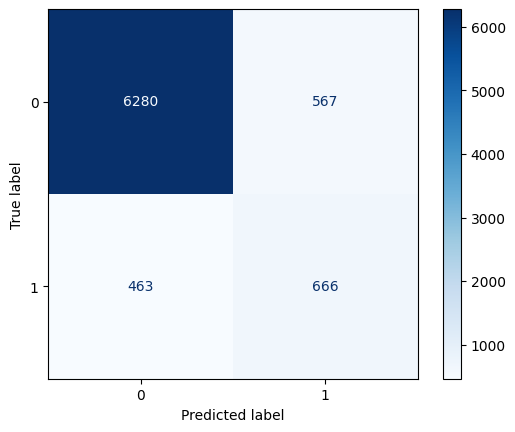

precision|precision_weighted|recall|recall_weighted|f1|f1_weighted|accuracy|balanced_accuracy|mcc [-1,1]
---|---|---|---|---|---|---|---|---
0.5401459854014599|0.8759633628849909|0.5899025686448184|0.8708625877632898|0.5639288738357325|0.8732114550369077|0.8708625877632898|0.7535462894341369|0.48896330899298107


Archivo de resultados guardado


In [51]:
pipeline = Pipeline([
    ('generate_embeddings', BetoTransformer(
        embeddings_pickle='beto/tweets_embeddings_bert.pickle',
        train_path='data/train.csv',
        test_path='data/test.csv'
    )),
    ('clf', LogisticRegression())
])

run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_logistic_regression_beto.csv',
    model_name='logistic_regression_beto'
)

## GPT

In [ ]:
pipeline = Pipeline([
    ('clf', GPTClassifier(model='gpt-3.5-turbo'))
])

run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_gpt.csv',
    model_name='gpt'
)

Se han truncado las últimas 5000 líneas del flujo de salida.
Estos son los Presupuestos más sociales de la historia de nuestro país. La primera piedra para construir la España de las próximas décadas. https://t.co/90UPnBHSa4

Tweet 11:
🟢Presentación del nuevo coordinador de Vox Torrelavega, Roberto García Corona  📅Jueves 18 de noviembre   🕤10.00 horas.  📍Bulevar Demetrio Herrero (Antiguo Ayuntamiento).  ¡Os esperamos! 🇪🇸  ⁦@Vox_Cantabria⁩ ⁦@vox_es⁩ #SoloQuedaVox https://t.co/HwzlraRbGB

Tweet 12:
¡Una gran noticia! Enhorabuena ⁦@margadcm⁩. Ganaste las #elecciones  y aunque sea dos años más tarde, #Torremolinos tendrá la alcaldesa que eligieron. Eres una gran persona  y serás una gran alcaldesa. ¡Mucha Suerte! 😘😘 https://t.co/FPSdgPyTon

Tweet 13:
Hoy he abordado con el presidente de @el_BID, Claver-Carone, varios asuntos de interés, como la situación económica de Iberoamérica, el impacto de la pandemia, la vacunación o la atracción de inversiones a la región.  España siempre encabezará

# Final results to csv

In [ ]:
final_results

In [ ]:
metrics_names = ['precision', 'precision_weighted', 'recall', 'recall_weighted', 'f1', 'f1_weighted', 'accuracy', 'balanced_accuracy', 'mcc [-1,1]']
header = '\t' + '\t'.join(metrics_names) + '\n'

with open('data/final_results.csv', "w") as final_results_file:
    final_results_file.write(header)

    for model, metrics in final_results.items():
        line = model + '\t' + '\t'.join(metrics.values()) + '\n'
        final_results_file.write(line)
